# Libraries + Dataset Load

In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 

from collections import defaultdict
from scipy.stats.stats import pearsonr
from scipy.stats import norm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
directory = '/content/drive/My Drive/DATA_MINING/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(directory+"Train_Dataset.csv")

#  1 - DATA SEMANTICS 

In [ ]:
df.head()

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0  52.0        No  ...                       2                    13
1  36.0        No  ...                       1                     6
2   NaN        No  ...                       1                     2
3  33.0        No  ...                       0                     7
4   NaN        No  ...                       2                     1

[5 rows x 33 columns]

In [ ]:
#df.tail(5)
#ANDRE: per riferimento a come sia fatto il df, c'è già df.head()

In [ ]:
#df.dtypes 
#ANDRE: df.info() dà le stesse + altre informazioni.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   Attrition                 1176 non-null   object 
 2   BusinessTravel            1069 non-null   object 
 3   DailyRate                 1176 non-null   int64  
 4   Department                1176 non-null   object 
 5   DistanceFromHome          1176 non-null   int64  
 6   Education                 1176 non-null   int64  
 7   EducationField            1176 non-null   object 
 8   EnvironmentSatisfaction   1176 non-null   int64  
 9   Gender                    1117 non-null   object 
 10  HourlyRate                1176 non-null   int64  
 11  JobInvolvement            1176 non-null   int64  
 12  JobLevel                  1176 non-null   int64  
 13  JobRole                   1176 non-null   object 
 14  JobSatis

Questo elenco fornisce una panoramica abbastanza generale dei dati a disposizione mostrando 1) il numero complessivo delle variabili (n+1), 2) quali di esse presentano dati mancanti (ogni variabile con un numero di entrate minore di 1176), 3) il tipo della variabile (numerica oppure categoriale ordinale (float64 e int64) vs categoriale nominale o dicotomica (object))

In [ ]:
df.describe()

Age    DailyRate  ...  YearsSinceLastPromotion  YearsWithCurrManager
count  1000.000000  1176.000000  ...              1176.000000           1176.000000
mean     37.199000   803.650510  ...                 2.171769              4.107993
std       9.015802   406.683045  ...                 3.189785              3.601097
min      18.000000   102.000000  ...                 0.000000              0.000000
25%      30.000000   460.500000  ...                 0.000000              2.000000
50%      36.000000   804.000000  ...                 1.000000              3.000000
75%      43.000000  1169.000000  ...                 3.000000              7.000000
max      60.000000  1499.000000  ...                15.000000             17.000000

[8 rows x 24 columns]

In [ ]:
#df[['Age']].head()
#ANDRE: Le varie head ci sono tutte in df.head()

# **2 - DISTRIBUTION of the VARIABLES and STATISTICS**

1. AGE - 176 Missing

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


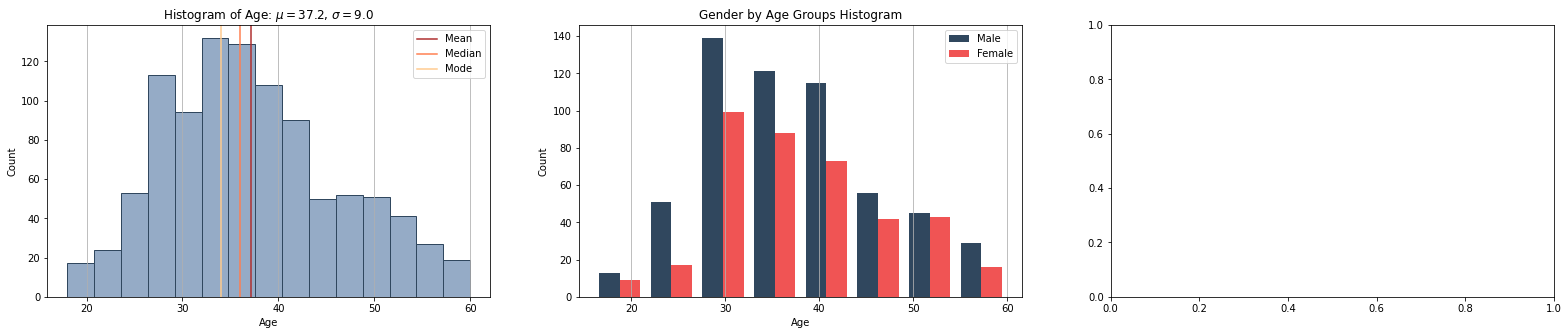

In [ ]:
#AGE - Numerica - Discreta - Histogram (Senza valori mancanti)
#176 Missing Values 
fig, ax = plt.subplots(1, 3, figsize=(27,5))

heights_age = df['Age'].dropna()
ax[0].hist(heights_age, bins=15, color='#95ABC6', ec="#30475e")
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of Age: $\mu=37.2$, $\sigma=9.0$')
mu = df['Age'].mean()  # mean of distribution
median = df['Age'].median() # median  
mode = df['Age'].mode()[0] # mode
sigma = df['Age'].std()  # standard deviation of distribution
ax[0].axvline(mu, color='#af2d2d', linestyle='-')
ax[0].axvline(median, color='coral', linestyle='-')
ax[0].axvline(mode, color='#ffcb8e', linestyle='-')
ax[0].legend({'Mean':mu, 'Median':median, 'Mode':mode})
ax[0].grid(axis="x") #ANDRE: Serve per lasciare solo la guida su Y      
x = heights_age.values

colors = ["#30475e", "#f05454"]
colors_sns = {"Male":"#30475e", "Female":"#f05454"}
colors_sns_2 = {"#30475e", "#f5a25d", "#f05454"}
male_age = df[df['Gender']=='Male']['Age']
female_age = df[df['Gender']=='Female']['Age']
max_age = max(df['Age'])
ax[1].hist([male_age, female_age], 
             bins=8, # bin_size
             range=(16, max_age), color=colors, 
             stacked=False)
ax[1].legend(('Male', 'Female'), loc='best')
ax[1].set_title('Gender by Age Groups Histogram')
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Count") #ANDRE: Prima c'era scritto "Gender"
ax[1].grid(axis="x")

male_single = df[df['Gender']=='Male']['Age'][df['MaritalStatus']=='Single']
female_single = df[df['Gender']=='Female']['Age'][df['MaritalStatus']=='Single']

male_married = df[df['Gender']=='Male']['Age'][df['MaritalStatus']=='Married']
female_married = df[df['Gender']=='Female']['Age'][df['MaritalStatus']=='Married']

# non molto informativo
#ax[2] = sns.violinplot(x="MaritalStatus", y="Age", hue="Gender", data=df, scale="count", palette=colors_sns, split=True)
#ax[2].grid(axis="y")
#ax[2].axhline(mu, color='#ffcb8e', linestyle='-')

#df_this = df.groupby(['Gender','MaritalStatus']).size().unstack(fill_value=0).plot.bar(stacked=False)
plt.show()


In generale si nota che la maggior parte dei dipendenti è perlopiù di giovane età: basti pensare che ben il 75% dei dipendenti ha meno di 43 anni. Il numero degli uomini () supera abbondantemente quello delle donne () in ogni fascia di età, ad eccezione delle più alte. Generalmente  

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


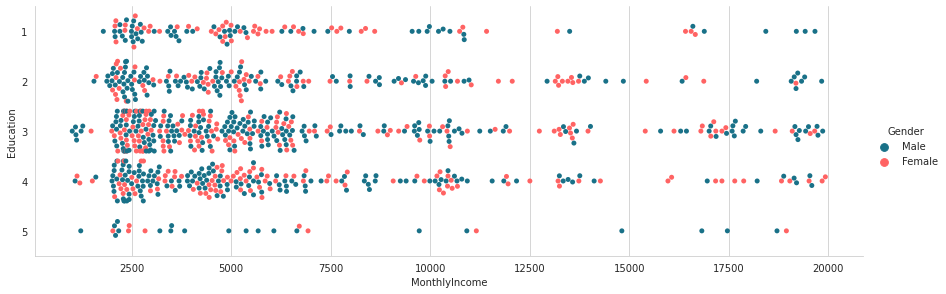

In [ ]:
sns.set_style("whitegrid")
g = sns.catplot(x="MonthlyIncome", y="Education", hue="Gender",
                kind="swarm", orient="h", height=4, aspect=3, palette = ["#197188", "#ff6363"],
                data=df)


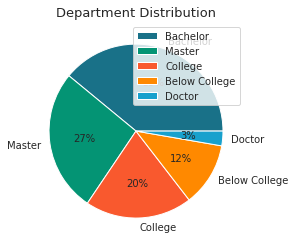

In [ ]:
labels = ["Bachelor", "Master", "College","Below College", "Doctor"]
sizes = df['Education'].value_counts()
color = ["#197188","#049474", "#f9592e", "#ff8900", "#18a1cd"]
plt.pie(sizes, labels = labels, colors = color, autopct='%1.0f%%')
plt.title('Department Distribution', fontsize = 13)
plt.legend(loc="best")
plt.show()

In [ ]:
men_single = (len(df[df['Gender']=='Male'][df['Age']>=18.0][df['Age']<=25.0][df['MaritalStatus']=='Single']), 
        len(df[df['Gender']=='Male'][df['Age']>25.0][df['Age']<=30.0][df['MaritalStatus']=='Single']), 
        len(df[df['Gender']=='Male'][df['Age']>30.0][df['Age']<=35.0][df['MaritalStatus']=='Single']), 
        len(df[df['Gender']=='Male'][df['Age']>35.0][df['Age']<=40.0][df['MaritalStatus']=='Single']), 
        len(df[df['Gender']=='Male'][df['Age']>40.0][df['Age']<=45.0][df['MaritalStatus']=='Single']),
        len(df[df['Gender']=='Male'][df['Age']>45.0][df['Age']<=50.0][df['MaritalStatus']=='Single']),
        len(df[df['Gender']=='Male'][df['Age']>50.0][df['Age']<=55.0][df['MaritalStatus']=='Single']),
        len(df[df['Gender']=='Male'][df['Age']>55.0][df['Age']<=60.0][df['MaritalStatus']=='Single']))
men_married = (len(df[df['Gender']=='Male'][df['Age']>=18.0][df['Age']<=25.0][df['MaritalStatus']=='Married']), 
        len(df[df['Gender']=='Male'][df['Age']>25.0][df['Age']<=30.0][df['MaritalStatus']=='Married']), 
        len(df[df['Gender']=='Male'][df['Age']>30.0][df['Age']<=35.0][df['MaritalStatus']=='Married']), 
        len(df[df['Gender']=='Male'][df['Age']>35.0][df['Age']<=40.0][df['MaritalStatus']=='Married']), 
        len(df[df['Gender']=='Male'][df['Age']>40.0][df['Age']<=45.0][df['MaritalStatus']=='Married']),
        len(df[df['Gender']=='Male'][df['Age']>45.0][df['Age']<=50.0][df['MaritalStatus']=='Married']),
        len(df[df['Gender']=='Male'][df['Age']>50.0][df['Age']<=55.0][df['MaritalStatus']=='Married']),
        len(df[df['Gender']=='Male'][df['Age']>55.0][df['Age']<=60.0][df['MaritalStatus']=='Married']))
men_divorced = (len(df[df['Gender']=='Male'][df['Age']>=18.0][df['Age']<=25.0][df['MaritalStatus']=='Divorced']), 
        len(df[df['Gender']=='Male'][df['Age']>25.0][df['Age']<=30.0][df['MaritalStatus']=='Divorced']), 
        len(df[df['Gender']=='Male'][df['Age']>30.0][df['Age']<=35.0][df['MaritalStatus']=='Divorced']), 
        len(df[df['Gender']=='Male'][df['Age']>35.0][df['Age']<=40.0][df['MaritalStatus']=='Divorced']), 
        len(df[df['Gender']=='Male'][df['Age']>40.0][df['Age']<=45.0][df['MaritalStatus']=='Divorced']),
        len(df[df['Gender']=='Male'][df['Age']>45.0][df['Age']<=50.0][df['MaritalStatus']=='Divorced']),
        len(df[df['Gender']=='Male'][df['Age']>50.0][df['Age']<=55.0][df['MaritalStatus']=='Divorced']),
        len(df[df['Gender']=='Male'][df['Age']>55.0][df['Age']<=60.0][df['MaritalStatus']=='Divorced']))

women_single = (len(df[df['Gender']=='Female'][df['Age']>=18.0][df['Age']<=25.0][df['MaritalStatus']=='Single']), 
        len(df[df['Gender']=='Female'][df['Age']>25.0][df['Age']<=30.0][df['MaritalStatus']=='Single']), 
        len(df[df['Gender']=='Female'][df['Age']>30.0][df['Age']<=35.0][df['MaritalStatus']=='Single']), 
        len(df[df['Gender']=='Female'][df['Age']>35.0][df['Age']<=40.0][df['MaritalStatus']=='Single']), 
        len(df[df['Gender']=='Female'][df['Age']>40.0][df['Age']<=45.0][df['MaritalStatus']=='Single']),
        len(df[df['Gender']=='Female'][df['Age']>45.0][df['Age']<=50.0][df['MaritalStatus']=='Single']),
        len(df[df['Gender']=='Female'][df['Age']>50.0][df['Age']<=55.0][df['MaritalStatus']=='Single']),
        len(df[df['Gender']=='Female'][df['Age']>55.0][df['Age']<=60.0][df['MaritalStatus']=='Single']))
women_married = (len(df[df['Gender']=='Female'][df['Age']>=18.0][df['Age']<=25.0][df['MaritalStatus']=='Married']), 
        len(df[df['Gender']=='Female'][df['Age']>25.0][df['Age']<=30.0][df['MaritalStatus']=='Married']), 
        len(df[df['Gender']=='Female'][df['Age']>30.0][df['Age']<=35.0][df['MaritalStatus']=='Married']), 
        len(df[df['Gender']=='Female'][df['Age']>35.0][df['Age']<=40.0][df['MaritalStatus']=='Married']), 
        len(df[df['Gender']=='Female'][df['Age']>40.0][df['Age']<=45.0][df['MaritalStatus']=='Married']),
        len(df[df['Gender']=='Female'][df['Age']>45.0][df['Age']<=50.0][df['MaritalStatus']=='Married']),
        len(df[df['Gender']=='Female'][df['Age']>50.0][df['Age']<=55.0][df['MaritalStatus']=='Married']),
        len(df[df['Gender']=='Female'][df['Age']>55.0][df['Age']<=60.0][df['MaritalStatus']=='Married']))
women_divorced = (len(df[df['Gender']=='Female'][df['Age']>=18.0][df['Age']<=25.0][df['MaritalStatus']=='Divorced']), 
        len(df[df['Gender']=='Female'][df['Age']>25.0][df['Age']<=30.0][df['MaritalStatus']=='Divorced']), 
        len(df[df['Gender']=='Female'][df['Age']>30.0][df['Age']<=35.0][df['MaritalStatus']=='Divorced']), 
        len(df[df['Gender']=='Female'][df['Age']>35.0][df['Age']<=40.0][df['MaritalStatus']=='Divorced']), 
        len(df[df['Gender']=='Female'][df['Age']>40.0][df['Age']<=45.0][df['MaritalStatus']=='Divorced']),
        len(df[df['Gender']=='Female'][df['Age']>45.0][df['Age']<=50.0][df['MaritalStatus']=='Divorced']),
        len(df[df['Gender']=='Female'][df['Age']>50.0][df['Age']<=55.0][df['MaritalStatus']=='Divorced']),
        len(df[df['Gender']=='Female'][df['Age']>55.0][df['Age']<=60.0][df['MaritalStatus']=='Divorced']))

men_divorced



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexe

(8, 20, 28, 25, 17, 6, 5, 6)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


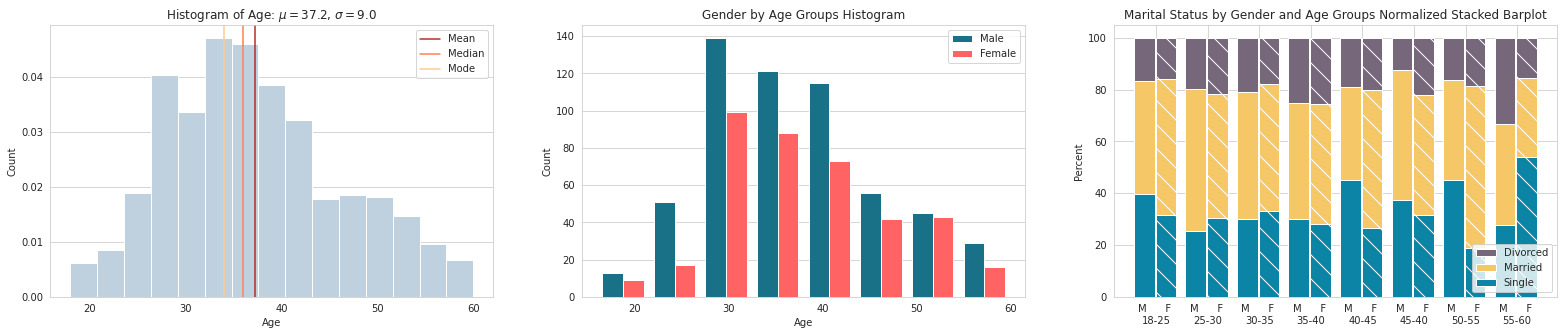

34.0


In [ ]:
N = 8
#1 18/25
#2 25/30
#3 30/35
#4 35/40
#5 40/45
#6 45/50
#7 50/55
#8 55/60

#men_single = (maschiosingleG1, maschiosingleG2,maschiosingleG3, maschiosingleG4, maschiosingleG5) = df[df['Gender']=='Male'][df['Age']==18.0][df['MaritalStatus']=='Single']
#men_married = (maschiomarriedG1, maschiomarriedG2, maschiomarriedG3, maschiomarriedG4, maschiomarriedG5)
#men_divorced = (maschiodivorcedG1, maschiodivorcedG2, maschiodivorcedG3, maschiodivorcedG4, maschiodivorcedG5)

fig, ax = plt.subplots(1, 3, figsize=(27,5))

heights_age = df['Age'].dropna()
ax[0].hist(heights_age, bins=15, color='#bfd1de', ec="white", density="yes")
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of Age: $\mu=37.2$, $\sigma=9.0$')
mu = df['Age'].mean()  # mean of distribution
median = df['Age'].median() # median  
mode = df['Age'].mode()[0] # mode
sigma = df['Age'].std()  # standard deviation of distribution
ax[0].axvline(mu, color='#af2d2d', linestyle='-')
ax[0].axvline(median, color='coral', linestyle='-')
ax[0].axvline(mode, color='#ffcb8e', linestyle='-')
ax[0].legend({'Mean':mu, 'Median':median, 'Mode':mode})
ax[0].grid(axis="x") #ANDRE: Serve per lasciare solo la guida su Y      
x = heights_age.values

colors = ["#197188", "#ff6363"]
colors_sns = {"Male":"#30475e", "Female":"#f05454"}
colors_sns_2 = {"#30475e", "#f5a25d", "#f05454"}
male_age = df[df['Gender']=='Male']['Age']
female_age = df[df['Gender']=='Female']['Age']
max_age = max(df['Age'])
ax[1].hist([male_age, female_age], 
             bins=8, # bin_size
             range=(16, max_age), color=colors, 
             stacked=False)


ax[1].legend(('Male', 'Female'), loc='best')
ax[1].set_title('Gender by Age Groups Histogram')
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Count") #ANDRE: Prima c'era scritto "Gender"
ax[1].grid(axis="x")

men_single = (19, 26, 40, 30, 40, 18, 14, 5)
men_married = (21, 56, 65, 45, 32, 24, 12, 7)
men_divorced = (8, 20, 28, 25, 17, 6, 5, 6)

men_single_cum = (men_single[0], men_single[1], men_single[2], men_single[3], men_single[4], men_single[5], men_single[6], men_single[7])
men_married_cum = (men_single[0]+men_married[0], 
                   men_single[1]+men_married[1], 
                   men_single[2]+men_married[2], 
                   men_single[3]+men_married[3], 
                   men_single[4]+men_married[4], 
                   men_single[5]+men_married[5], 
                   men_single[6]+men_married[6], 
                   men_single[7]+men_married[7])
men_divorced_cum = (men_single[0]+men_married[0]+men_divorced[0], 
                   men_single[1]+men_married[1]+men_divorced[1], 
                   men_single[2]+men_married[2]+men_divorced[2], 
                   men_single[3]+men_married[3]+men_divorced[3], 
                   men_single[4]+men_married[4]+men_divorced[4], 
                   men_single[5]+men_married[5]+men_divorced[5], 
                   men_single[6]+men_married[6]+men_divorced[6], 
                   men_single[7]+men_married[7]+men_divorced[7])

men_single_perc = (men_single[0]*100/(men_single[0]+men_married[0]+men_divorced[0]), 
                   men_single[1]*100/(men_single[1]+men_married[1]+men_divorced[1]),
                   men_single[2]*100/(men_single[2]+men_married[2]+men_divorced[2]),
                   men_single[3]*100/(men_single[3]+men_married[3]+men_divorced[3]),
                   men_single[4]*100/(men_single[4]+men_married[4]+men_divorced[4]),
                   men_single[5]*100/(men_single[5]+men_married[5]+men_divorced[5]),
                   men_single[6]*100/(men_single[6]+men_married[6]+men_divorced[6]), 
                   men_single[7]*100/(men_single[7]+men_married[7]+men_divorced[7]))
men_married_perc = (men_married[0]*100/(men_single[0]+men_married[0]+men_divorced[0]), 
                   men_married[1]*100/(men_single[1]+men_married[1]+men_divorced[1]),
                   men_married[2]*100/(men_single[2]+men_married[2]+men_divorced[2]),
                   men_married[3]*100/(men_single[3]+men_married[3]+men_divorced[3]),
                   men_married[4]*100/(men_single[4]+men_married[4]+men_divorced[4]),
                   men_married[5]*100/(men_single[5]+men_married[5]+men_divorced[5]),
                   men_married[6]*100/(men_single[6]+men_married[6]+men_divorced[6]), 
                   men_married[7]*100/(men_single[7]+men_married[7]+men_divorced[7]))
men_divorced_perc = (men_divorced[0]*100/(men_single[0]+men_married[0]+men_divorced[0]), 
                   men_divorced[1]*100/(men_single[1]+men_married[1]+men_divorced[1]),
                   men_divorced[2]*100/(men_single[2]+men_married[2]+men_divorced[2]),
                   men_divorced[3]*100/(men_single[3]+men_married[3]+men_divorced[3]),
                   men_divorced[4]*100/(men_single[4]+men_married[4]+men_divorced[4]),
                   men_divorced[5]*100/(men_single[5]+men_married[5]+men_divorced[5]),
                   men_divorced[6]*100/(men_single[6]+men_married[6]+men_divorced[6]), 
                   men_divorced[7]*100/(men_single[7]+men_married[7]+men_divorced[7]))

men_single_cum_perc = (men_single_perc[0], men_single_perc[1], men_single_perc[2], men_single_perc[3], men_single_perc[4], men_single_perc[5], men_single_perc[6], men_single_perc[7])
men_married_cum_perc = (men_single_perc[0]+men_married_perc[0], 
                   men_single_perc[1]+men_married_perc[1], 
                   men_single_perc[2]+men_married_perc[2], 
                   men_single_perc[3]+men_married_perc[3], 
                   men_single_perc[4]+men_married_perc[4], 
                   men_single_perc[5]+men_married_perc[5], 
                   men_single_perc[6]+men_married_perc[6], 
                   men_single_perc[7]+men_married_perc[7])
men_divorced_cum_perc = (men_single_perc[0]+men_married_perc[0]+men_divorced_perc[0], 
                   men_single_perc[1]+men_married_perc[1]+men_divorced_perc[1], 
                   men_single_perc[2]+men_married_perc[2]+men_divorced_perc[2], 
                   men_single_perc[3]+men_married_perc[3]+men_divorced_perc[3], 
                   men_single_perc[4]+men_married_perc[4]+men_divorced_perc[4], 
                   men_single_perc[5]+men_married_perc[5]+men_divorced_perc[5], 
                   men_single_perc[6]+men_married_perc[6]+men_divorced_perc[6], 
                   men_single_perc[7]+men_married_perc[7]+men_divorced_perc[7])


ind = np.arange(N)  # the x locations for the groups
width = 0.4       # the width of the bars
xtra_space = 0.05

rects3 = ax[2].bar(ind + xtra_space*2, men_divorced_cum_perc, width, color='#76677b')
rects2 = ax[2].bar(ind + xtra_space*2, men_married_cum_perc, width, color='#f5c767') 
rects1 = ax[2].bar(ind + xtra_space*2, men_single_cum_perc, width, color='#0b84a5') 

women_single = (6, 21, 30, 22, 12, 13, 6, 7)
women_married = (10, 33, 44, 36, 24, 19, 20, 4)
women_divorced = (3, 15, 16, 20, 9, 9, 6, 2)

women_single_cum = (women_single[0], women_single[1], women_single[2], women_single[3], women_single[4], women_single[5], women_single[6], women_single[7])
women_married_cum = (women_single[0]+women_married[0], 
                   women_single[1]+women_married[1], 
                   women_single[2]+women_married[2], 
                   women_single[3]+women_married[3], 
                   women_single[4]+women_married[4], 
                   women_single[5]+women_married[5], 
                   women_single[6]+women_married[6], 
                   women_single[7]+women_married[7])
women_divorced_cum = (women_single[0]+women_married[0]+women_divorced[0], 
                   women_single[1]+women_married[1]+women_divorced[1], 
                   women_single[2]+women_married[2]+women_divorced[2], 
                   women_single[3]+women_married[3]+women_divorced[3], 
                   women_single[4]+women_married[4]+women_divorced[4], 
                   women_single[5]+women_married[5]+women_divorced[5], 
                   women_single[6]+women_married[6]+women_divorced[6], 
                   women_single[7]+women_married[7]+women_divorced[7])

women_single_perc = (women_single[0]*100/(women_single[0]+women_married[0]+women_divorced[0]), 
                   women_single[1]*100/(women_single[1]+women_married[1]+women_divorced[1]),
                   women_single[2]*100/(women_single[2]+women_married[2]+women_divorced[2]),
                   women_single[3]*100/(women_single[3]+women_married[3]+women_divorced[3]),
                   women_single[4]*100/(women_single[4]+women_married[4]+women_divorced[4]),
                   women_single[5]*100/(women_single[5]+women_married[5]+women_divorced[5]),
                   women_single[6]*100/(women_single[6]+women_married[6]+women_divorced[6]), 
                   women_single[7]*100/(women_single[7]+women_married[7]+women_divorced[7]))
women_married_perc = (women_married[0]*100/(women_single[0]+women_married[0]+women_divorced[0]), 
                   women_married[1]*100/(women_single[1]+women_married[1]+women_divorced[1]),
                   women_married[2]*100/(women_single[2]+women_married[2]+women_divorced[2]),
                   women_married[3]*100/(women_single[3]+women_married[3]+women_divorced[3]),
                   women_married[4]*100/(women_single[4]+women_married[4]+women_divorced[4]),
                   women_married[5]*100/(women_single[5]+women_married[5]+women_divorced[5]),
                   women_married[6]*100/(women_single[6]+women_married[6]+women_divorced[6]), 
                   women_married[7]*100/(women_single[7]+women_married[7]+women_divorced[7]))
women_divorced_perc = (women_divorced[0]*100/(women_single[0]+women_married[0]+women_divorced[0]), 
                   women_divorced[1]*100/(women_single[1]+women_married[1]+women_divorced[1]),
                   women_divorced[2]*100/(women_single[2]+women_married[2]+women_divorced[2]),
                   women_divorced[3]*100/(women_single[3]+women_married[3]+women_divorced[3]),
                   women_divorced[4]*100/(women_single[4]+women_married[4]+women_divorced[4]),
                   women_divorced[5]*100/(women_single[5]+women_married[5]+women_divorced[5]),
                   women_divorced[6]*100/(women_single[6]+women_married[6]+women_divorced[6]), 
                   women_divorced[7]*100/(women_single[7]+women_married[7]+women_divorced[7]))

women_single_cum_perc = (women_single_perc[0], women_single_perc[1], women_single_perc[2], women_single_perc[3], women_single_perc[4], women_single_perc[5], women_single_perc[6], women_single_perc[7])
women_married_cum_perc = (women_single_perc[0]+women_married_perc[0], 
                   women_single_perc[1]+women_married_perc[1], 
                   women_single_perc[2]+women_married_perc[2], 
                   women_single_perc[3]+women_married_perc[3], 
                   women_single_perc[4]+women_married_perc[4], 
                   women_single_perc[5]+women_married_perc[5], 
                   women_single_perc[6]+women_married_perc[6], 
                   women_single_perc[7]+women_married_perc[7])
women_divorced_cum_perc = (women_single_perc[0]+women_married_perc[0]+women_divorced_perc[0], 
                   women_single_perc[1]+women_married_perc[1]+women_divorced_perc[1], 
                   women_single_perc[2]+women_married_perc[2]+women_divorced_perc[2], 
                   women_single_perc[3]+women_married_perc[3]+women_divorced_perc[3], 
                   women_single_perc[4]+women_married_perc[4]+women_divorced_perc[4], 
                   women_single_perc[5]+women_married_perc[5]+women_divorced_perc[5], 
                   women_single_perc[6]+women_married_perc[6]+women_divorced_perc[6], 
                   women_single_perc[7]+women_married_perc[7]+women_divorced_perc[7])



rects2 = ax[2].bar(ind + width + xtra_space + xtra_space  + 0.02, women_divorced_cum_perc, width, color='#76677b', hatch='\\')
rects2 = ax[2].bar(ind + width + xtra_space + xtra_space  + 0.02, women_married_cum_perc, width, color='#f5c767', hatch='\\') 
rects2 = ax[2].bar(ind + width + xtra_space + xtra_space  + 0.02, women_single_cum_perc, width, color='#0b84a5', hatch='\\') 

# add some text for labels, title and axes ticks
ax[2].set_ylabel('Percent')
ax[2].set_title('Marital Status by Gender and Age Groups Normalized Stacked Barplot')
ax[2].legend(("Divorced","Married","Single"), loc='lower right')
ax[2].set_xticks(ind + width/1.5 +  xtra_space +  + 0.02)
ax[2].set_xticklabels(('M      F \n18-25', 'M      F \n25-30', 'M      F \n30-35', 'M      F \n35-40', 'M      F \n40-45', 'M      F \n45-40', 'M      F \n50-55', 'M      F \n55-60'))

plt.show()

print(mode)

In un'età compresa tra i 30 e i 40 anni si rileva il maggior numero di dipendenti

In [ ]:
#ANDRE: Visto che il punto si chiama "var dis AND STATISTICS", 
#magari serve qualcosa di questo tipo?
df['Age'].describe()

count    1000.000000
mean       37.199000
std         9.015802
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [ ]:
#Dopo aver rimpiazzato i valori mancanti...
#CHIARA: da ricevimento non necessario
#df2.Age.describe()

2. ATTRITION

In [ ]:
df.Attrition.unique()

array(['No', 'Yes'], dtype=object)

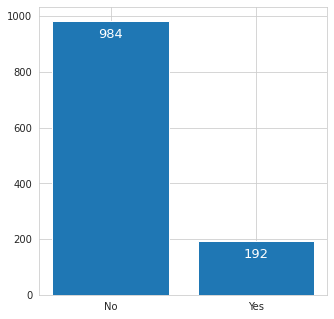

In [ ]:
#ATTRITION - Categorica (Binaria) - YES/NO - Bar Chart

#CHIARA: Secondo me può essere interessante studiare l'attrition (che più o meno indica un dipendente che per qualche motivo lascia il lavoro) in relazione alla lontananza da casa, al salario e alla JobSatisfaction  

fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1])

values = ["No", "Yes"]

heights_attrition = [df[df['Attrition']=='No'].shape[0],
                     df[df['Attrition']=='Yes'].shape[0]]

for i, bar in enumerate(heights_attrition):    #ANDRE: Per mettere il numero sulle barre. Viene un po' brutto però!
  plt.text(values[i], bar-60, str(bar), ha='center', fontsize=13, color='white')     #CHIARA: ho provato a renderlo un po' meno bruttino, se mi date l'ok lo faccio per tutti

ax.bar(values, heights_attrition)
plt.show()

In [ ]:
print("Numero di persone che fanno ancora parte dell'azienda:",df[df['Attrition']=='No'].shape[0])
print("Numero di persone che non fanno parte dell'azienda :", df[df['Attrition']=='Yes'].shape[0])


Numero di persone che fanno ancora parte dell'azienda: 984
Numero di persone che non fanno parte dell'azienda : 192


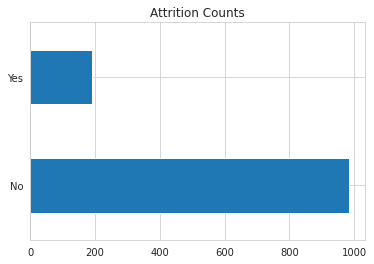

In [ ]:
df['Attrition'].value_counts().plot(kind='barh', x='Attrition',
                                   title='Attrition Counts')
plt.show()

Lo faccio per ultimo dopo aver presentato tutte le variabili interessanti vedo come queste incidono sull'attrition


3. BUSINESS TRAVEL - 107 Missing


In [ ]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', nan, 'Non-Travel'],
      dtype=object)

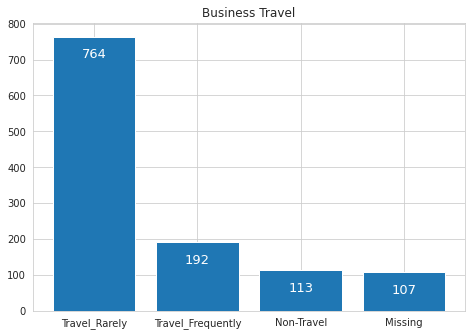

In [ ]:
#business travel - Categorica - Travel_Rarely / Travel_Frequently / Non-Travel 
#Bar Chart (Missing Values come colonna a parte)
#107 Missing Values

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = ["Travel_Rarely", "Travel_Frequently","Non-Travel", "Missing"]
heights_travel = [df[df['BusinessTravel']=="Travel_Rarely"].shape[0],
                  df[df['BusinessTravel']=="Travel_Frequently"].shape[0],
                  df[df['BusinessTravel']=="Non-Travel"].shape[0],
                   df[df['BusinessTravel'].isnull()].shape[0]]
for i, bar in enumerate(heights_travel):
  plt.text(values[i], bar-60, str(bar), ha='center', fontsize=13, color='white')
ax.title.set_text("Business Travel")  
ax.bar(values, heights_travel)

plt.show()

In [ ]:
print("Numero di dipendenti che viaggiano raramente:",df[df['BusinessTravel']=="Travel_Rarely"].shape[0])
print("Numero di dipendenti che viaggiano frequentemente:",df[df['BusinessTravel']=="Travel_Frequently"].shape[0])
print("Numero di dipendenti che non viaggiano:",df[df['BusinessTravel']=="Non-Travel"].shape[0])
print("Valori mancanti:",df[df['BusinessTravel'].isnull()].shape[0])

Numero di dipendenti che viaggiano raramente: 764
Numero di dipendenti che viaggiano frequentemente: 192
Numero di dipendenti che non viaggiano: 113
Valori mancanti: 107


4. DAILY RATE

In [ ]:
df.DailyRate.describe()

count    1176.000000
mean      803.650510
std       406.683045
min       102.000000
25%       460.500000
50%       804.000000
75%      1169.000000
max      1499.000000
Name: DailyRate, dtype: float64

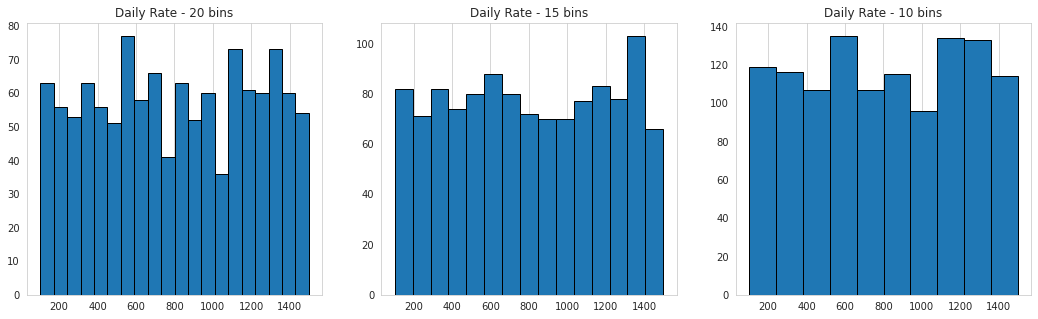

In [ ]:
#DailyRate - Numerica Discreta - Histogram
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  #ANDRE: Per mettere più grafici accanto! Poi invece di plt.hist si usa axs[n].hist
heights_dailyrate = df['DailyRate']


axs[0].hist(heights_dailyrate, bins=20, ec="black") 
axs[0].title.set_text('Daily Rate - 20 bins')

axs[1].hist(heights_dailyrate, bins=15, ec="black")
axs[1].title.set_text('Daily Rate - 15 bins')

axs[2].hist(heights_dailyrate, bins=10, ec="black")
axs[2].title.set_text('Daily Rate - 10 bins')

for ax in axs:
  ax.grid(axis="y")
  
plt.show()

5. DEPARTMENT

In [ ]:
df.Department.unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

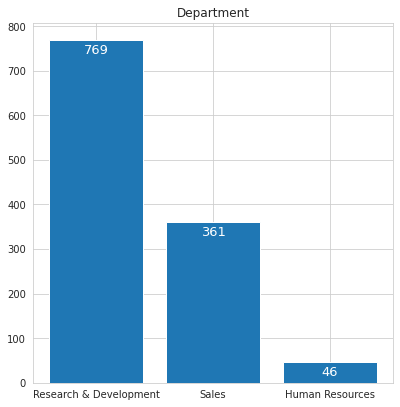

In [ ]:
#Department - Categorica - Research & Development / Sales / Human Resources - Bar Chart

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["Research & Development", "Sales","Human Resources"]
heights_department = [df[df['Department']=="Research & Development"].shape[0],
                  df[df['Department']=="Sales"].shape[0],
                  df[df['Department']=="Human Resources"].shape[0],
                   ]
for i, bar in enumerate(heights_department):
  plt.text(values[i], bar-30, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("Department")  
ax.bar(values, heights_department)

plt.show()

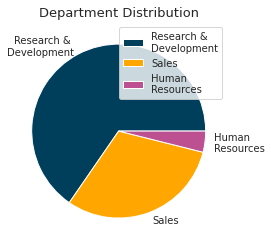

In [ ]:

labels = ['Research & \nDevelopment', 'Sales', 'Human \nResources']
sizes = df['Department'].value_counts()
colors = ["#003f5c", "#ffa600", "#bc5090"]
explode = [0.07, 0.07, 0.15]

plt.pie(sizes, labels = labels,colors = colors)
plt.title('Department Distribution', fontsize = 13)
plt.legend(loc="best")
plt.show()

6. DISTANCE FROM HOME

In [ ]:
df.DistanceFromHome.describe()

count    1176.000000
mean        9.210034
std         8.097024
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

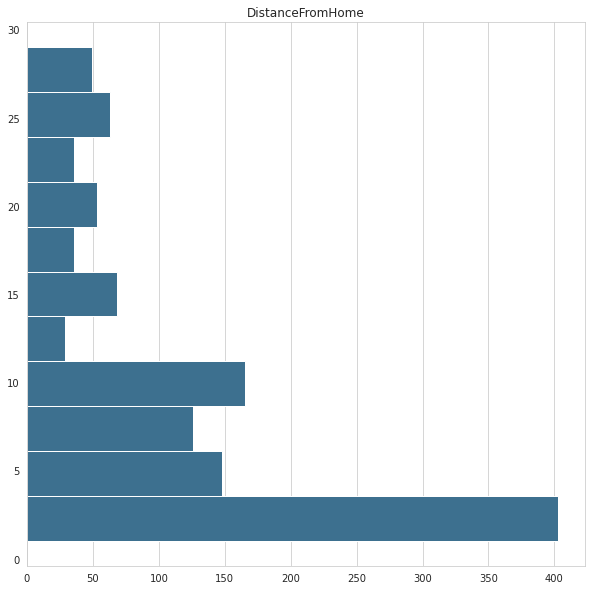

In [ ]:
# DistanceFromHome - Numerica - Discreta 

#CHIARA: Secondo me è interessante studiare la distribuzione della variabile in base al sesso (la donna tendenzialmente si allontana meno dell'uomo) e al MaritalStatus (chi ha famiglia tendenzialmente si allontana meno da casa) 
fig, axs = plt.subplots(figsize=(10, 10))  
heights_dailyrate = df['DistanceFromHome']

plt.hist(heights_dailyrate, bins=11, ec="white", color = "#3d708f", orientation='horizontal') 
plt.title('DistanceFromHome')
plt.grid(axis="y")
plt.show()

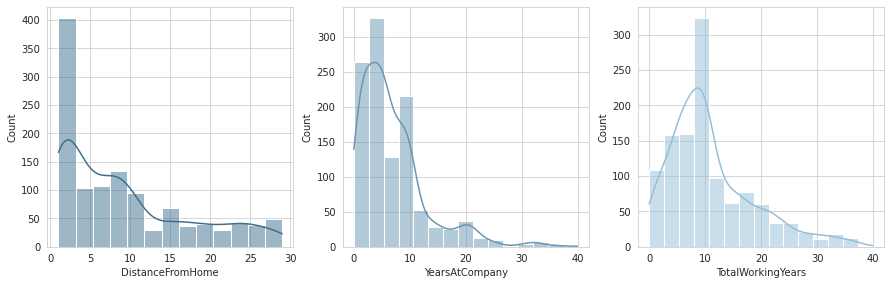

In [ ]:
plt.figure(figsize = (25, 10))

plt.subplot(334)
sns.histplot(df['DistanceFromHome'], kde=True, color = "#3d708f")
fig = plt.gcf()
fig.set_size_inches(10,15)

plt.subplot(335)
sns.histplot(df['YearsAtCompany'], kde=True, bins=15, color = "#6996b3")
fig = plt.gcf()
fig.set_size_inches(10,15)

plt.subplot(336)
sns.histplot(df['TotalWorkingYears'], kde=True, bins=15, color = "#94bed9")
fig = plt.gcf()
fig.set_size_inches(15,15)

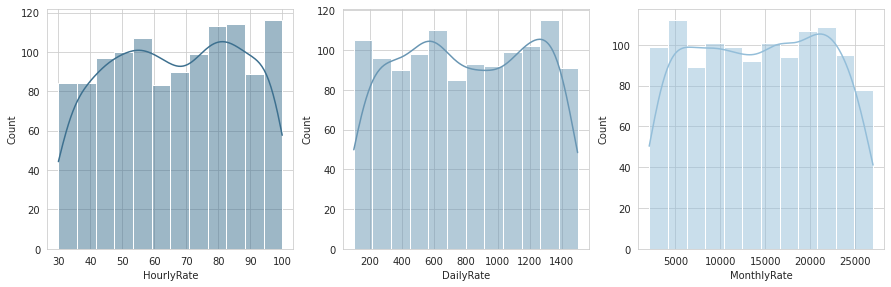

In [ ]:
plt.figure(figsize = (15, 7))

plt.subplot(334)
sns.histplot(df['HourlyRate'], kde=True, color = "#3d708f")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.subplot(335)
sns.histplot(df['DailyRate'], kde=True, color = "#6996b3")
fig = plt.gcf()
fig.set_size_inches(15,15)

plt.subplot(336)
sns.histplot(df['MonthlyRate'], kde=True, color = "#94bed9")
fig = plt.gcf()
fig.set_size_inches(15,15)


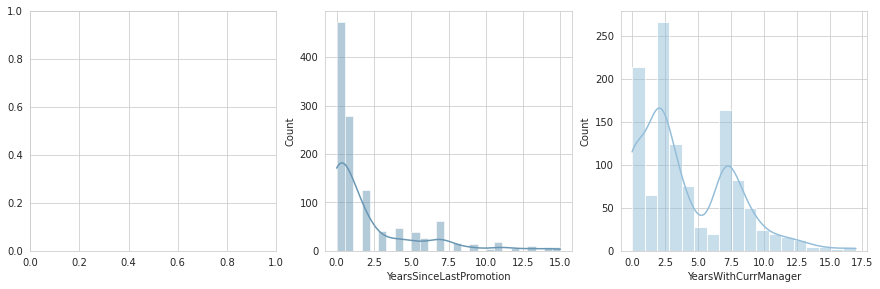

In [ ]:
plt.figure(figsize = (25, 10))

plt.subplot(334)
#sns.histplot(df['YearsInCurrentRole'], vertical=True, kde=True, color = "#3d708f")
fig = plt.gcf()
fig.set_size_inches(10,15)

plt.subplot(335)
sns.histplot(df['YearsSinceLastPromotion'], kde=True, color = "#6996b3")
fig = plt.gcf()
fig.set_size_inches(10,15)

plt.subplot(336)
sns.histplot(df['YearsWithCurrManager'], kde=True, color = "#94bed9")
fig = plt.gcf()
fig.set_size_inches(15,15)


7. EDUCATION

In [ ]:
df.Education.unique()

array([4, 1, 3, 2, 5])

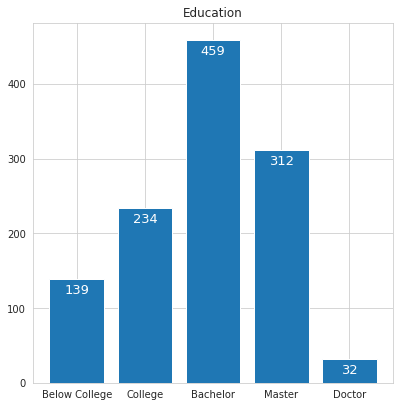

In [ ]:
#Education - Categorica (con i numeri) 

#CHIARA: da studiare in relazione al salario e al JobRole
""" 1 'Below College'
    2 'College'
    3 'Bachelor'
    4 'Master'
    5 'Doctor' """

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["Below College", "College","Bachelor", "Master", "Doctor"]
heights_education = [df[df['Education']==1].shape[0],
                  df[df['Education']==2].shape[0],
                  df[df['Education']==3].shape[0],
                  df[df['Education']==4].shape[0],
                  df[df['Education']==5].shape[0],
                   ]
for i, bar in enumerate(heights_education):
  plt.text(values[i], bar-20, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("Education")  
ax.bar(values, heights_education)

plt.show()

8. EDUCATION FIELD

In [ ]:
#EducationField - Categorica - Medical - Life Sciences - Technical Degree - Human Resources - Other - Marketing
df.EducationField.unique()

array(['Medical', 'Life Sciences', 'Technical Degree', 'Other',
       'Human Resources', 'Marketing'], dtype=object)

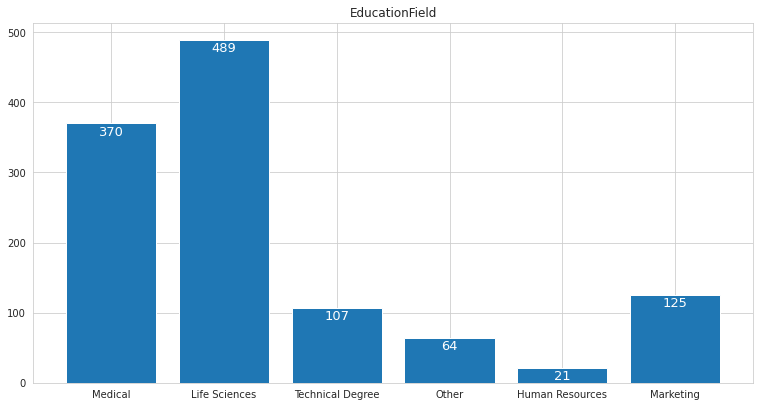

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
values = df.EducationField.unique() #["Below College", "College","Bachelor", "Master", "Doctor"]
heights_educationfield = [df[df['EducationField']=='Medical'].shape[0],
                  df[df['EducationField']=='Life Sciences'].shape[0],
                  df[df['EducationField']=='Technical Degree'].shape[0],
                  df[df['EducationField']=='Other'].shape[0],
                  df[df['EducationField']=='Human Resources'].shape[0],
                  df[df['EducationField']=='Marketing'].shape[0],
                   ]
for i, bar in enumerate(heights_educationfield):
  plt.text(values[i], bar-17, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("EducationField")  
ax.bar(values, heights_educationfield)

plt.show()

9. ENVIRONMENT SATISFACTION

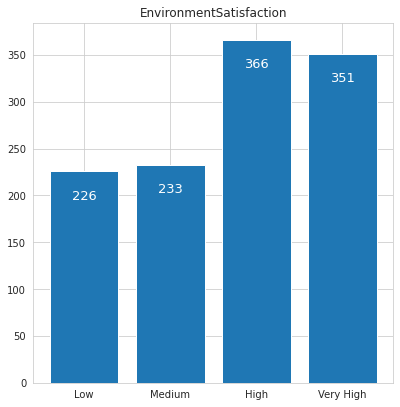

In [ ]:
#EnvironmentSatisfaction - Categorica (numeri)
"""
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
"""
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["Low", "Medium","High", "Very High"]
heights = [df[df['EnvironmentSatisfaction']==1].shape[0],
                  df[df['EnvironmentSatisfaction']==2].shape[0],
                  df[df['EnvironmentSatisfaction']==3].shape[0],
                  df[df['EnvironmentSatisfaction']==4].shape[0]  ]
for i, bar in enumerate(heights):
  plt.text(values[i], bar-30, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("EnvironmentSatisfaction")  
ax.bar(values, heights)

plt.show()

10. GENDER - 59 Missing

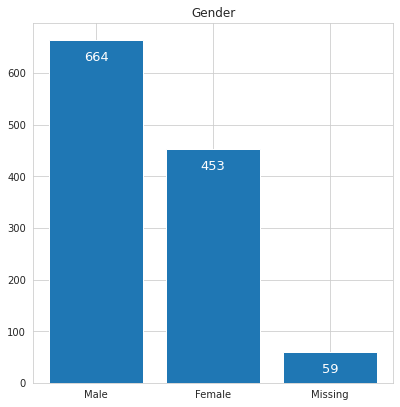

In [ ]:
#Gender - Male/Female - Missing
#59 Missing Values 

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["Male", "Female", "Missing"]
heights = [df[df['Gender']=="Male"].shape[0],
                  df[df['Gender']=="Female"].shape[0],
                  df[df['Gender'].isnull()].shape[0],
                   ]
for i, bar in enumerate(heights):
  plt.text(values[i], bar-40, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("Gender")  
ax.bar(values, heights)

plt.show()
#56,43
#38,52

11. HOURLY RATE

In [ ]:
df['HourlyRate'].describe()

count    1176.000000
mean       66.299320
std        20.266116
min        30.000000
25%        49.000000
50%        66.000000
75%        84.000000
max       100.000000
Name: HourlyRate, dtype: float64

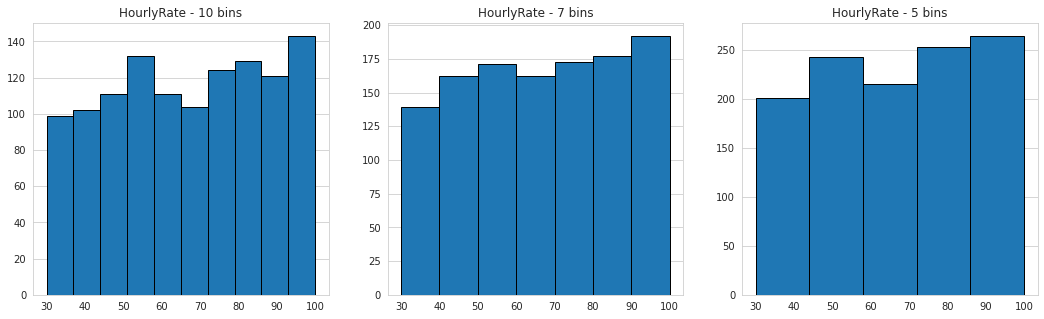

In [ ]:
#HourlyRate - Numerica
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  
heights_dailyrate = df['HourlyRate']

axs[0].hist(heights_dailyrate, bins=10, ec="black") 
axs[0].title.set_text('HourlyRate - 10 bins')

axs[1].hist(heights_dailyrate, bins=7, ec="black")
axs[1].title.set_text('HourlyRate - 7 bins')

axs[2].hist(heights_dailyrate, bins=5, ec="black")
axs[2].title.set_text('HourlyRate - 5 bins')

for ax in axs:
  ax.grid(axis="x")
  
plt.show()

12. JOB INVOLVEMENT

In [ ]:
df.JobInvolvement.unique()

array([3, 4, 1, 2])

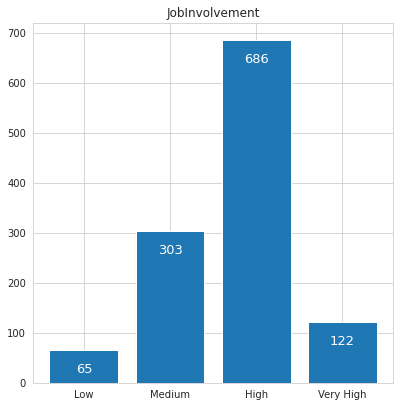

In [ ]:
#JobInvolvement - Categorica (con i numeri)
"""
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
"""
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["Low", "Medium","High", "Very High"]
heights = [df[df['JobInvolvement']==1].shape[0],
                  df[df['JobInvolvement']==2].shape[0],
                  df[df['JobInvolvement']==3].shape[0],
                  df[df['JobInvolvement']==4].shape[0]  ]
for i, bar in enumerate(heights):
  plt.text(values[i], bar-45, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("JobInvolvement")  
ax.bar(values, heights)

plt.show()

13. JOB LEVEL

In [ ]:
df.JobLevel.unique()

array([3, 5, 2, 1, 4])

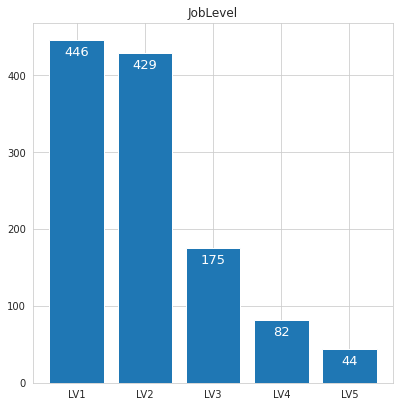

In [ ]:
#JobLevel - Categorica (con numeri) #lv12345

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["LV1", "LV2","LV3", "LV4", "LV5"]
heights = [df[df['JobLevel']==1].shape[0],
                  df[df['JobLevel']==2].shape[0],
                  df[df['JobLevel']==3].shape[0],
                  df[df['JobLevel']==4].shape[0],
                  df[df['JobLevel']==5].shape[0]  ]
for i, bar in enumerate(heights):
  plt.text(values[i], bar-20, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("JobLevel")  
ax.bar(values, heights)

plt.show()

14. JOB ROLE

In [ ]:
df.JobRole.unique()

array(['Research Director', 'Manager', 'Sales Executive',
       'Research Scientist', 'Laboratory Technician',
       'Sales Representative', 'Manufacturing Director',
       'Healthcare Representative', 'Human Resources'], dtype=object)

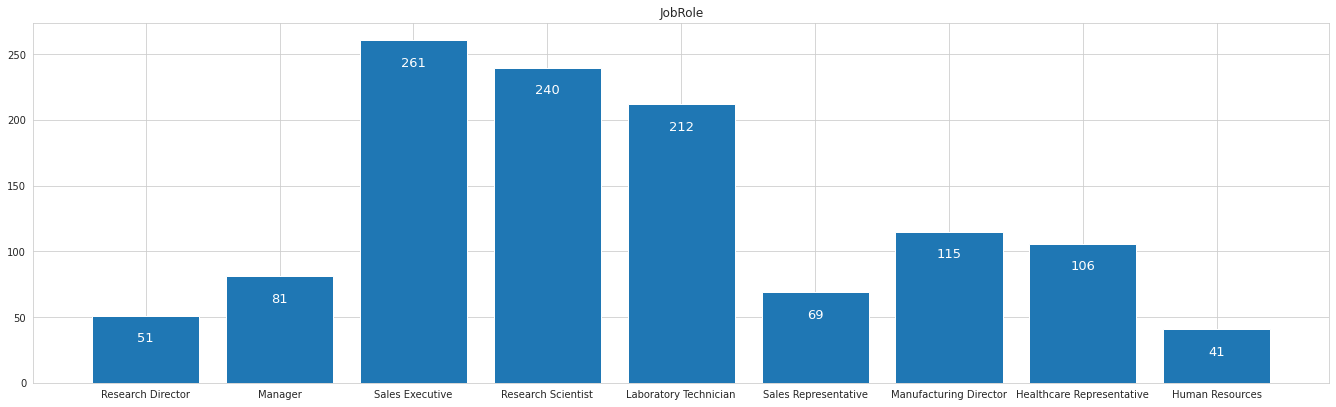

In [ ]:
#JobRole - Categorica
fig = plt.figure(figsize=(18, 5))
ax = fig.add_axes([0,0,1,1])
values = df.JobRole.unique()

heights = [ ]
for value in values:
  heights.append((df[df["JobRole"]==value].shape[0]))

for i, bar in enumerate(heights):
  plt.text(values[i], bar-20, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("JobRole")  
ax.bar(values, heights)
plt.show()

In [ ]:
for value in values:
  print("Numero di "+value+" :", df[df['JobRole']==value].shape[0])

Numero di Research Director : 51
Numero di Manager : 81
Numero di Sales Executive : 261
Numero di Research Scientist : 240
Numero di Laboratory Technician : 212
Numero di Sales Representative : 69
Numero di Manufacturing Director : 115
Numero di Healthcare Representative : 106
Numero di Human Resources : 41


15. JOB SATISFACTION

In [ ]:
df.JobSatisfaction.unique()

array([3, 4, 2, 1])

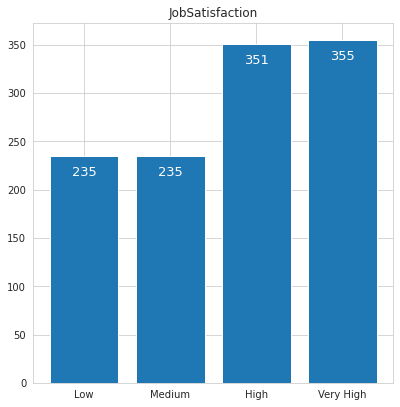

In [ ]:
#JobSatisfaction - Categorica con i numeri
"""
JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
"""
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["Low", "Medium","High", "Very High"]
heights = [df[df['JobSatisfaction']==1].shape[0],
                  df[df['JobSatisfaction']==2].shape[0],
                  df[df['JobSatisfaction']==3].shape[0],
                  df[df['JobSatisfaction']==4].shape[0]  ]
for i, bar in enumerate(heights):
  plt.text(values[i], bar-20, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("JobSatisfaction")  
ax.bar(values, heights)

plt.show()

16. MARITAL STATUS

In [ ]:
df.MaritalStatus.unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

Female [30.242825607064017, 20.614035087719298, 49.00662251655629]
Male [33.8855421686747, 21.53614457831325, 44.57831325301205]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


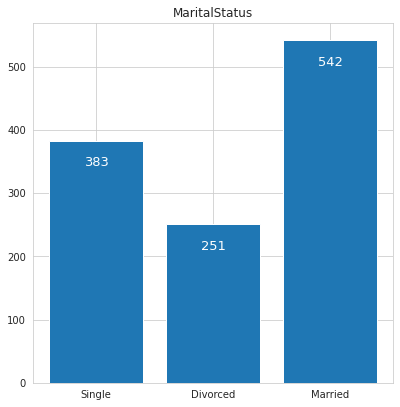

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["Single", "Divorced", "Married"]
heights = [df[df['MaritalStatus']=="Single"].shape[0],
                  df[df['MaritalStatus']=="Divorced"].shape[0],
                  df[df['MaritalStatus']=="Married"].shape[0]]
for i, bar in enumerate(heights):
  plt.text(values[i], bar-40, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("MaritalStatus")  
ax.bar(values, heights)

heights_w = [df[df['MaritalStatus']=="Single"][df['Gender']=='Female'].shape[0]*100/453,
                  df[df['MaritalStatus']=="Divorced"][df['Gender']=='Female'].shape[0]*100/456,
                  df[df['MaritalStatus']=="Married"][df['Gender']=='Female'].shape[0]*100/453]
heights_m = [df[df['MaritalStatus']=="Single"][df['Gender']=='Male'].shape[0]*100/664,
                  (df[df['MaritalStatus']=="Divorced"][df['Gender']=='Male'].shape[0]*100)/664,
                  df[df['MaritalStatus']=="Married"][df['Gender']=='Male'].shape[0]*100/664]
print("Female",heights_w)
print("Male",heights_m)
plt.show()

17. MONTHLY INCOME - 213 Missing

In [ ]:
df['MonthlyIncome'].describe()
#213 Missing Values

count      963.000000
mean      6565.946002
std       4710.625603
min       1009.000000
25%       2969.000000
50%       4969.000000
75%       8585.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

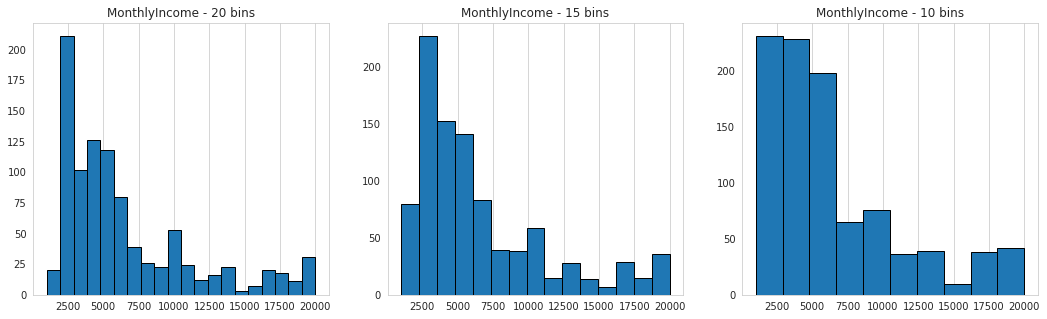

In [ ]:
#Monthly Income - Numerica
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  
heights = df['MonthlyIncome']

axs[0].hist(heights, bins=20, ec="black") 
axs[0].title.set_text('MonthlyIncome - 20 bins')

axs[1].hist(heights, bins=15, ec="black")
axs[1].title.set_text('MonthlyIncome - 15 bins')

axs[2].hist(heights, bins=10, ec="black")
axs[2].title.set_text('MonthlyIncome - 10 bins')

for ax in axs:
  ax.grid(axis="y")
  
plt.show()

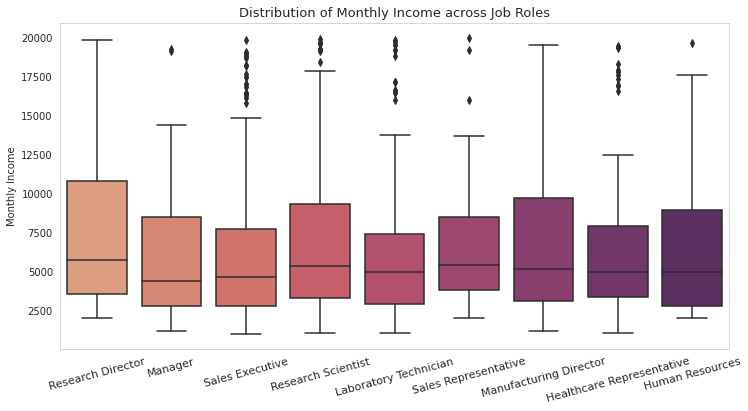

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
ax = sns.boxplot(x = df['JobRole'], y =df['MonthlyIncome'], data = df, palette = 'flare')
ax.set_xlabel(xlabel = '', fontsize = 10)
ax.set_ylabel(ylabel = 'Monthly Income', fontsize = 10)
ax.set_title(label = 'Distribution of Monthly Income across Job Roles', fontsize = 13)
plt.xticks(rotation = 15, fontsize = 11)
plt.grid(axis="y")
plt.show()

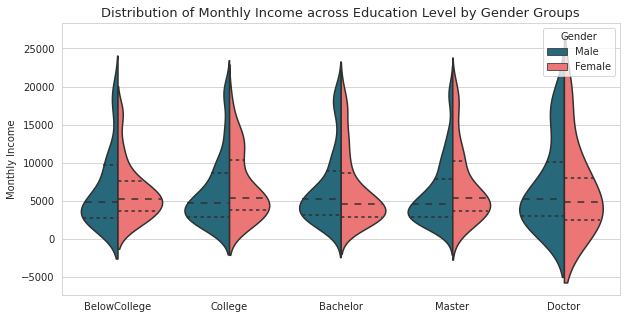

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
ax = sns.violinplot(x=df['Education'], y=df['MonthlyIncome'], hue="Gender", inner="quartile", split=True, data = df, palette = ["#197188", "#ff6363"])
ax.set_xlabel(xlabel = '', fontsize = 10)
ax.set_ylabel(ylabel = 'Monthly Income', fontsize = 10)
ax.set_title(label = 'Distribution of Monthly Income across Education Level by Gender Groups', fontsize = 13)
plt.xticks([0,1,2,3,4],["BelowCollege","College","Bachelor","Master","Doctor"])

plt.show()

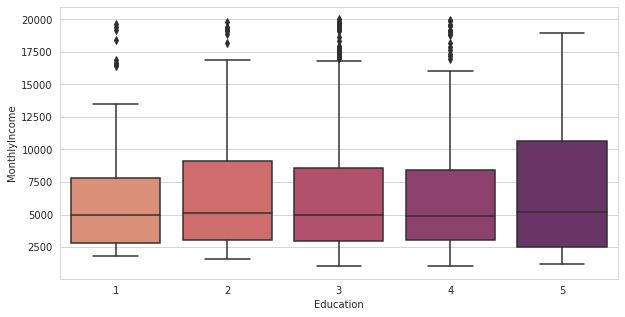

In [ ]:
ax = sns.boxplot(x = df['Education'], y =df['MonthlyIncome'], data = df, palette = 'flare')

18. MONTHLY RATE

In [ ]:
df['MonthlyRate'].describe()

count     1176.000000
mean     14395.836735
std       7111.845106
min       2097.000000
25%       8227.250000
50%      14434.000000
75%      20489.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

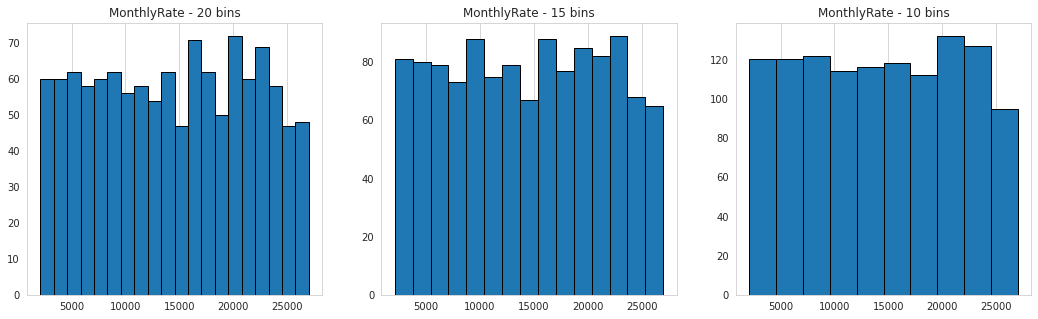

In [ ]:
#MonthlyRate - Numerica
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  
heights = df['MonthlyRate']

axs[0].hist(heights, bins=20, ec="black") 
axs[0].title.set_text('MonthlyRate - 20 bins')

axs[1].hist(heights, bins=15, ec="black")
axs[1].title.set_text('MonthlyRate - 15 bins')

axs[2].hist(heights, bins=10, ec="black")
axs[2].title.set_text('MonthlyRate - 10 bins')

for ax in axs:
  ax.grid(axis="y")
  
plt.show()

19. NUM_COMPANIES_WORK

In [ ]:
#NumCompaniesWorked - Numerica
df['NumCompaniesWorked'].describe()

count    1176.000000
mean        2.663265
std         2.491287
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

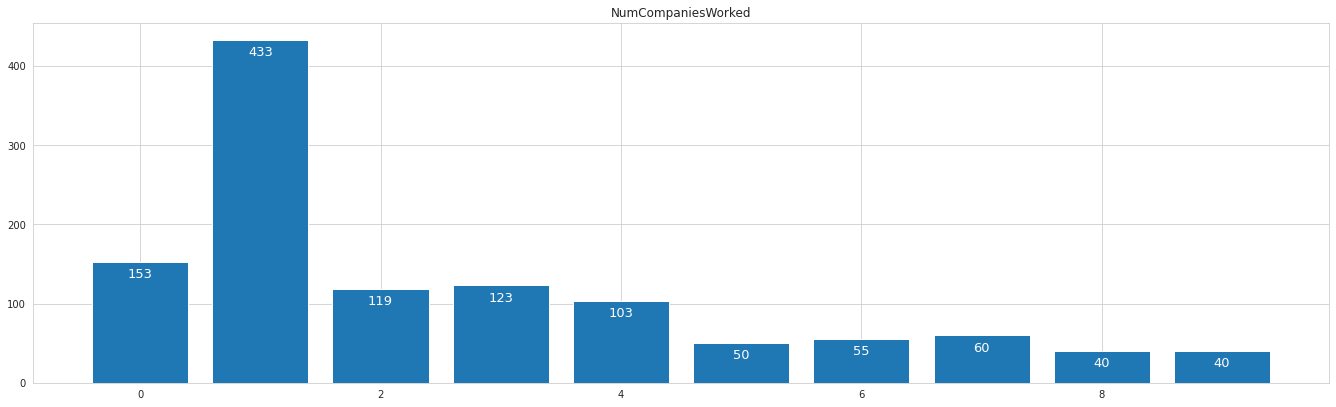

In [ ]:
fig = plt.figure(figsize=(18, 5))
ax = fig.add_axes([0,0,1,1])
values = df.NumCompaniesWorked.unique()

heights = [ ]
for value in values:
  heights.append((df[df["NumCompaniesWorked"]==value].shape[0]))

for i, bar in enumerate(heights):
  plt.text(values[i], bar-20, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("NumCompaniesWorked")  
ax.bar(values, heights)
plt.show()

20. OVER 18 - 372 Missing

In [ ]:
df.Over18.unique()

array([nan, 'Y'], dtype=object)

In [ ]:
df['Over18'].describe()
#372 Missing values

count     804
unique      1
top         Y
freq      804
Name: Over18, dtype: object

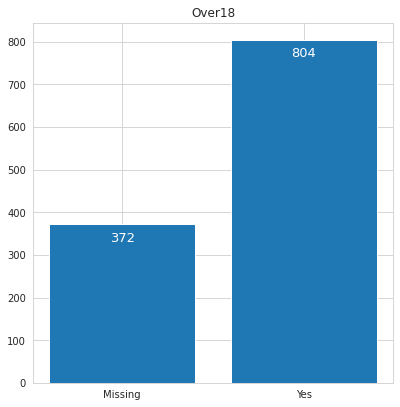

In [ ]:
#372 Missing values
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["Missing", "Yes"]
heights = [df[df['Over18'].isnull()].shape[0],
                  df[df['Over18']=="Y"].shape[0]]
for i, bar in enumerate(heights):
  plt.text(values[i], bar-40, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("Over18")  
ax.bar(values, heights)

plt.show()

21. OVERTIME

In [ ]:
df.OverTime.unique()

array(['No', 'Yes'], dtype=object)

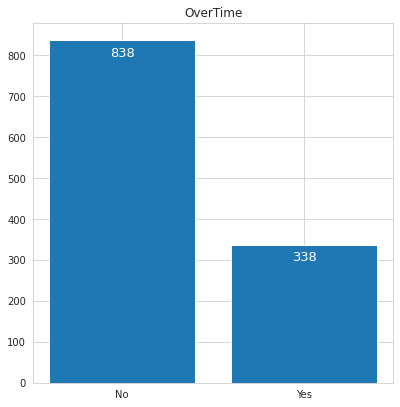

In [ ]:
#OverTime - Categorica - YES NO
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["No", "Yes"]
heights = [df[df['OverTime']=="No"].shape[0],
                  df[df['OverTime']=="Yes"].shape[0]]
for i, bar in enumerate(heights):
  plt.text(values[i], bar-40, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("OverTime")  
ax.bar(values, heights)

plt.show()

22. PERCENT SALARY HIKE

In [ ]:
df['PercentSalaryHike'].describe()

count    1176.000000
mean       15.176871
std         3.623941
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

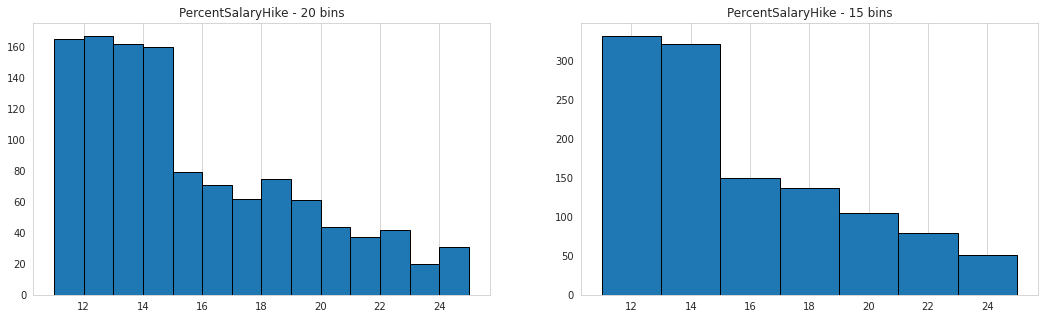

In [ ]:
#PercentSalaryHike - Numerica
fig, axs = plt.subplots(1, 2, figsize=(18, 5))  
heights = df['PercentSalaryHike']

axs[0].hist(heights, bins=14, ec="black") 
axs[0].title.set_text('PercentSalaryHike - 20 bins')

axs[1].hist(heights, bins=7, ec="black")
axs[1].title.set_text('PercentSalaryHike - 15 bins')

for ax in axs:
  ax.grid(axis="y")
  
plt.show()

23. PERFORMANCE RATING

In [ ]:
#138 Missing Values
df.PerformanceRating.unique()

array([ 3., nan,  4.])

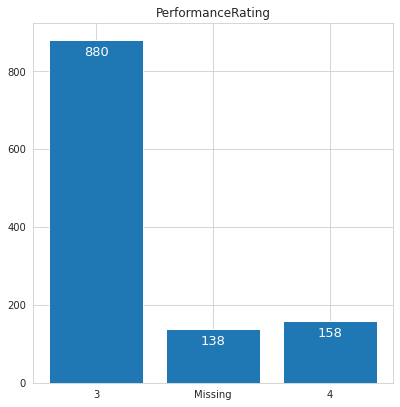

In [ ]:
#PerformanceRating - Categorica - 1 2 3 4
"""
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'
"""
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["3", "Missing", "4"]
heights = [df[df['PerformanceRating']==3].shape[0],
                  df[df['PerformanceRating'].isnull()].shape[0], 
           df[df['PerformanceRating']==4].shape[0]
           ]
for i, bar in enumerate(heights):
  plt.text(values[i], bar-40, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("PerformanceRating")  
ax.bar(values, heights)

plt.show()

24. RELATIONSHIP SATISFACTION

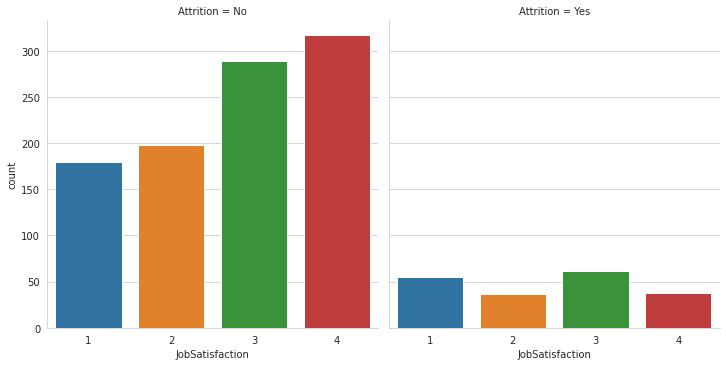

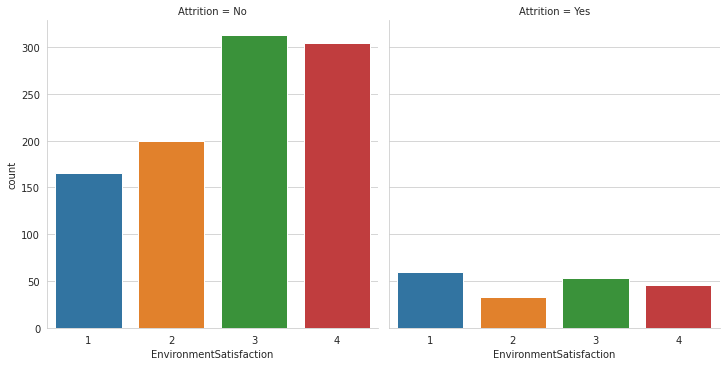

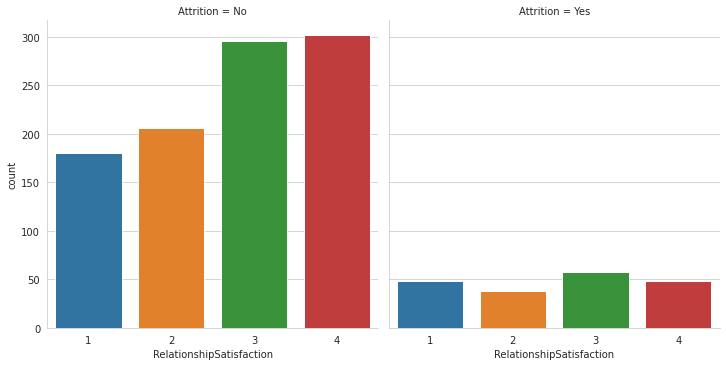

In [ ]:
sns.catplot(x="JobSatisfaction", kind="count", col='Attrition', data=df)
sns.catplot(x="EnvironmentSatisfaction", kind="count", col='Attrition', data=df)
sns.catplot(x="RelationshipSatisfaction", kind="count", col='Attrition', data=df)

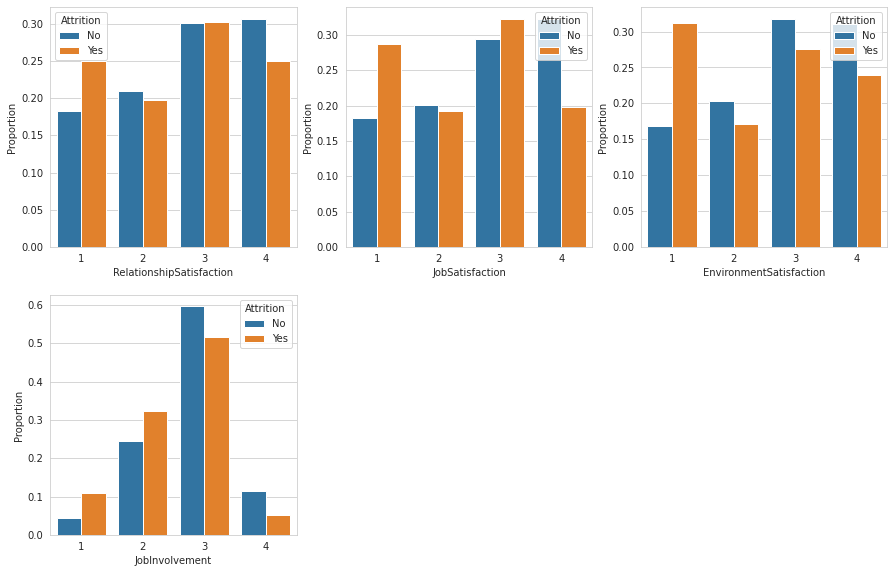

In [ ]:
plt.figure(figsize = (40, 10))

plt.subplot(334)
x, y, hue = "RelationshipSatisfaction", "Proportion", "Attrition"
hue_order = ["Yes", "No"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

fig = plt.gcf()
fig.set_size_inches(15,15)

plt.subplot(335)
x, y, hue = "JobSatisfaction", "Proportion", "Attrition"
hue_order = ["Yes", "No"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

fig = plt.gcf()
fig.set_size_inches(15,15)

plt.subplot(336)
x, y, hue = "EnvironmentSatisfaction", "Proportion", "Attrition"
hue_order = ["Yes", "No"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

fig = plt.gcf()
fig.set_size_inches(15,15)

plt.subplot(337)
x, y, hue = "JobInvolvement", "Proportion", "Attrition"
hue_order = ["Yes", "No"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

fig = plt.gcf()
fig.set_size_inches(15,15)

In [ ]:
df['JobSatisfaction'][df['Attrition']=='No'].value_counts()

4    317
3    289
2    198
1    180
Name: JobSatisfaction, dtype: int64

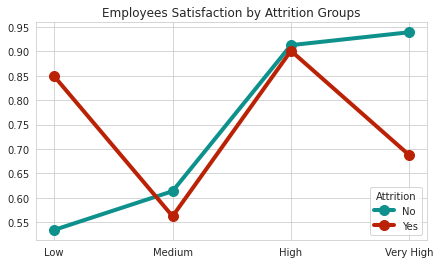

In [ ]:
_, ax = plt.subplots(figsize=(7,4))
df_sati_NO = pd.DataFrame ({
    "JobSatisfaction_NO":df['JobSatisfaction'][df['Attrition']=='No'].value_counts(normalize=True),
    "EnvironmentSatisfaction_NO":df['EnvironmentSatisfaction'][df['Attrition']=='No'].value_counts(normalize=True),
    "RelationshipSatisfaction_NO":df['RelationshipSatisfaction'][df['Attrition']=='No'].value_counts(normalize=True),
    #"JobInvolvement_NO":df['JobInvolvement'][df['Attrition']=='No'].value_counts(normalize=True)
})

df_sati_SI = pd.DataFrame ({
    "JobSatisfaction_SI":df['JobSatisfaction'][df['Attrition']=='Yes'].value_counts(normalize=True),
    "EnvironmentSatisfaction_SI":df['EnvironmentSatisfaction'][df['Attrition']=='Yes'].value_counts(normalize=True),
    "RelationshipSatisfaction_SI":df['RelationshipSatisfaction'][df['Attrition']=='Yes'].value_counts(normalize=True),
    #"JobInvolvement_SI":df['JobInvolvement'][df['Attrition']=='Yes'].value_counts(normalize=True)
})

df_sati_tot = pd.DataFrame ({
    "No" : df['JobSatisfaction'][df['Attrition']=='No'].value_counts(normalize=True) +
            df['EnvironmentSatisfaction'][df['Attrition']=='No'].value_counts(normalize=True) +
            df['RelationshipSatisfaction'][df['Attrition']=='No'].value_counts(normalize=True),
    
    "Yes" : df['JobSatisfaction'][df['Attrition']=='Yes'].value_counts(normalize=True) +
            df['EnvironmentSatisfaction'][df['Attrition']=='Yes'].value_counts(normalize=True) + 
            df['RelationshipSatisfaction'][df['Attrition']=='Yes'].value_counts(normalize=True),
})

df_sati_tot.plot(marker='o', markersize=10, color=['#0e918c','#bb2205'], linewidth=4, ax=ax)
plt.xticks(np.arange(1, 5, 1.0), ["Low", "Medium", "High", "Very High"])
plt.title("Employees Satisfaction by Attrition Groups")
plt.legend(title="Attrition", fancybox=True, loc='lower right')

plt.show()

In [ ]:
df_sati_SI

JobSatisfaction_SI  EnvironmentSatisfaction_SI  RelationshipSatisfaction_SI
1            0.286458                    0.312500                     0.250000
2            0.192708                    0.171875                     0.197917
3            0.322917                    0.276042                     0.302083
4            0.197917                    0.239583                     0.250000

In [ ]:
df_sati_NO

JobSatisfaction_NO  EnvironmentSatisfaction_NO  RelationshipSatisfaction_NO
1            0.182927                    0.168699                     0.182927
2            0.201220                    0.203252                     0.209350
3            0.293699                    0.318089                     0.300813
4            0.322154                    0.309959                     0.306911

In [ ]:
df_sati_tot

No       Yes
1  0.534553  0.848958
2  0.613821  0.562500
3  0.912602  0.901042
4  0.939024  0.687500

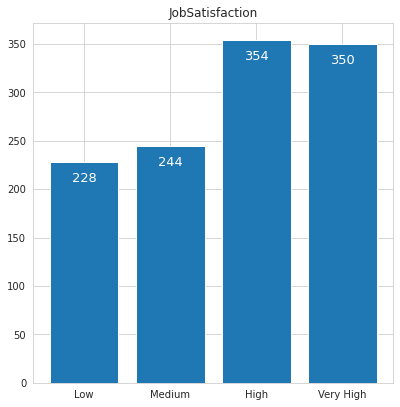

In [ ]:
#RelationshipSatisfaction
"""
RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
"""
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["Low", "Medium","High", "Very High"]
heights = [df[df['RelationshipSatisfaction']==1].shape[0],
                  df[df['RelationshipSatisfaction']==2].shape[0],
                  df[df['RelationshipSatisfaction']==3].shape[0],
                  df[df['RelationshipSatisfaction']==4].shape[0]  ]
for i, bar in enumerate(heights):
  plt.text(values[i], bar-20, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("JobSatisfaction")  
ax.bar(values, heights)

plt.show()

25. STANDARD HOURS - 570 Missing

In [ ]:
df.StandardHours.unique()
#570 Missing Values

array([80., nan])

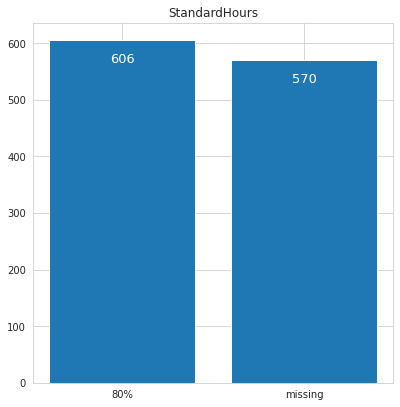

In [ ]:

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["80%", "missing"]
heights = [df[df['StandardHours']==80].shape[0],
                  df[df['StandardHours'].isnull()].shape[0]]
for i, bar in enumerate(heights):
  plt.text(values[i], bar-40, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("StandardHours")  
ax.bar(values, heights)

plt.show()

26. STOCK OPTION LEVEL

In [ ]:
df.StockOptionLevel.unique()

array([0, 1, 3, 2])

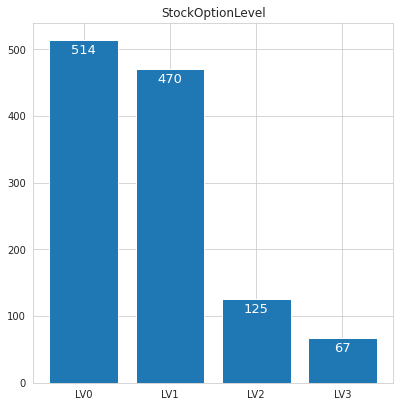

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["LV0", "LV1","LV2", "LV3"]
heights = [df[df['StockOptionLevel']==0].shape[0],
                  df[df['StockOptionLevel']==1].shape[0],
                  df[df['StockOptionLevel']==2].shape[0],
                  df[df['StockOptionLevel']==3].shape[0]]

for i, bar in enumerate(heights):
  plt.text(values[i], bar-20, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("StockOptionLevel")  
ax.bar(values, heights)

plt.show()

27. TOTAL WORKING YEARS

In [ ]:
df.TotalWorkingYears.describe()

count    1176.000000
mean       11.019558
std         7.694848
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

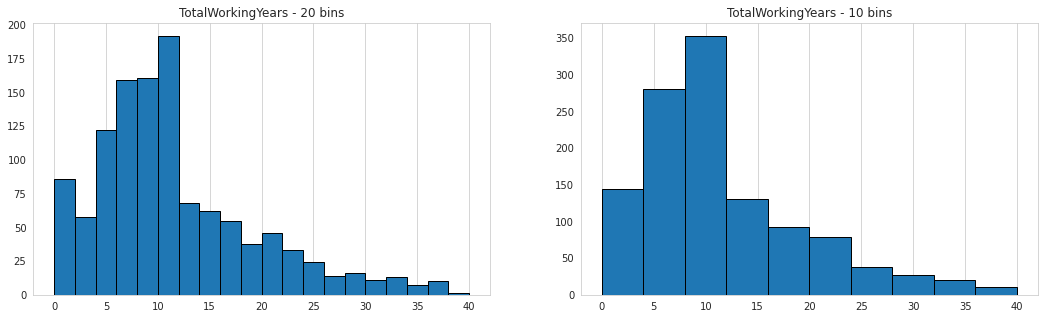

In [ ]:
#TotalWorkingYears - Numerica
fig, axs = plt.subplots(1, 2, figsize=(18, 5))  
heights = df['TotalWorkingYears']

axs[0].hist(heights, bins=20, ec="black") 
axs[0].title.set_text('TotalWorkingYears - 20 bins')

axs[1].hist(heights, bins=10, ec="black")
axs[1].title.set_text('TotalWorkingYears - 10 bins')

for ax in axs:
  ax.grid(axis="y")
  
plt.show()

28. TRAINING TIMES LAST YEARS - 233 Missing

In [ ]:
df.TrainingTimesLastYear.unique()
#233 Missing Values

array([ 2.,  3.,  4.,  1., nan,  0.,  5.,  6.])

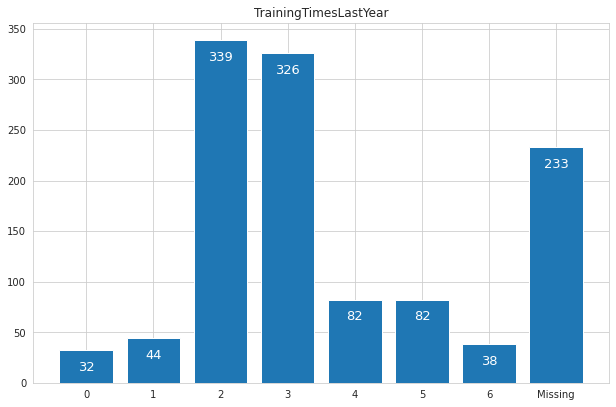

In [ ]:
#TrainingTimesLastYear - Numerica - Bar Chart
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0,0,1,1])
values = ["0", "1","2", "3", "4", "5", "6", "Missing"]
heights = [
           df[df['TrainingTimesLastYear']==0].shape[0],
           df[df['TrainingTimesLastYear']==1].shape[0],
                  df[df['TrainingTimesLastYear']==2].shape[0],
                  df[df['TrainingTimesLastYear']==3].shape[0],
                  df[df['TrainingTimesLastYear']==4].shape[0], 
            df[df['TrainingTimesLastYear']==5].shape[0],
            df[df['TrainingTimesLastYear']==6].shape[0],
           df[df['TrainingTimesLastYear'].isnull()].shape[0]  ]
for i, bar in enumerate(heights):
  plt.text(values[i], bar-20, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("TrainingTimesLastYear")  
ax.bar(values, heights)

plt.show()

**29**. WORK LIFE BALANCE

In [ ]:
df.WorkLifeBalance.unique()

array([2, 3, 1, 4])

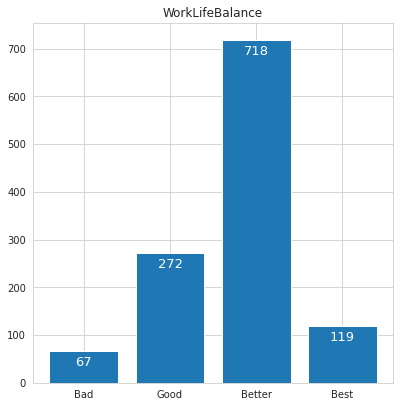

In [ ]:
""" 1 'Bad'
2 'Good'
3 'Better'
4 'Best' """
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
values = ["Bad", "Good","Better", "Best"]
heights = [df[df['WorkLifeBalance']==1].shape[0],
                  df[df['WorkLifeBalance']==2].shape[0],
                  df[df['WorkLifeBalance']==3].shape[0],
                  df[df['WorkLifeBalance']==4].shape[0]]

for i, bar in enumerate(heights):
  plt.text(values[i], bar-30, str(bar), ha='center', fontsize=13, color='white')

ax.title.set_text("WorkLifeBalance")  
ax.bar(values, heights)

plt.show()

30. YEARS AT COMPANY - 60 Missing

In [ ]:
df.YearsAtCompany.describe()
#60 Missing Values --> Non plottati

count    1116.000000
mean        6.926523
std         6.063193
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

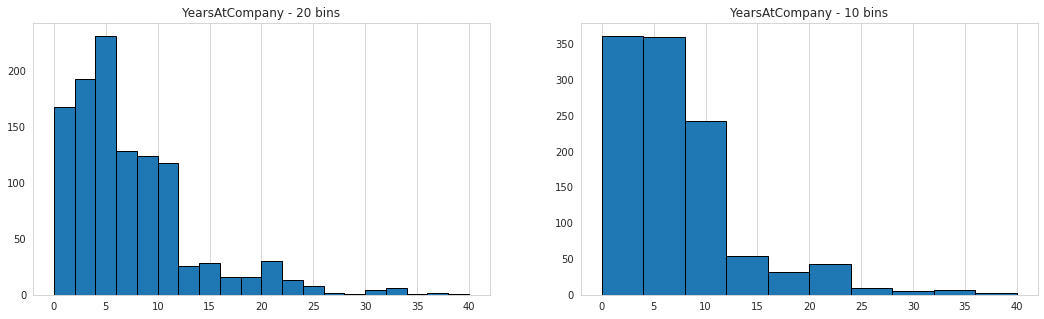

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))  
heights = df['YearsAtCompany']

axs[0].hist(heights, bins=20, ec="black") 
axs[0].title.set_text('YearsAtCompany - 20 bins')

axs[1].hist(heights, bins=10, ec="black")
axs[1].title.set_text('YearsAtCompany - 10 bins')

for ax in axs:
  ax.grid(axis="y")
  
plt.show()

31. YEARS IN CURRENT ROLE

In [ ]:
df.YearsInCurrentRole.describe()

count    1176.000000
mean        4.188776
std         3.637405
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

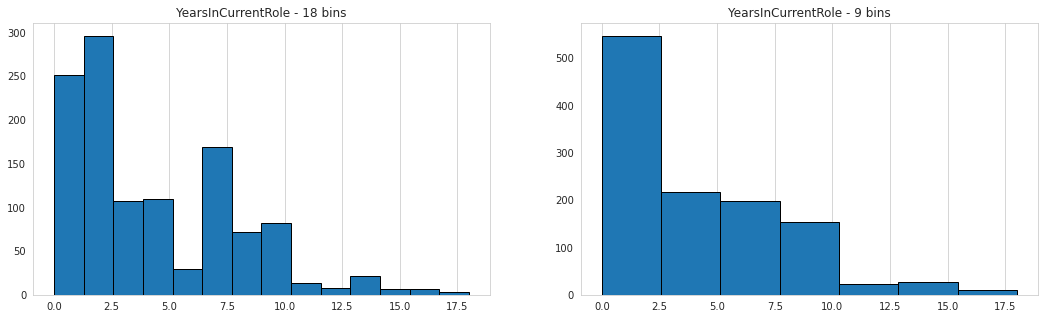

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))  
heights = df['YearsInCurrentRole']

axs[0].hist(heights, bins=14, ec="black") 
axs[0].title.set_text('YearsInCurrentRole - 18 bins')

axs[1].hist(heights, bins=7, ec="black")
axs[1].title.set_text('YearsInCurrentRole - 9 bins')

for ax in axs:
  ax.grid(axis="y")
  
plt.show()

32. YEARS SINCE LAST PROMOTION

In [ ]:
df.YearsSinceLastPromotion.describe()

count    1176.000000
mean        2.171769
std         3.189785
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

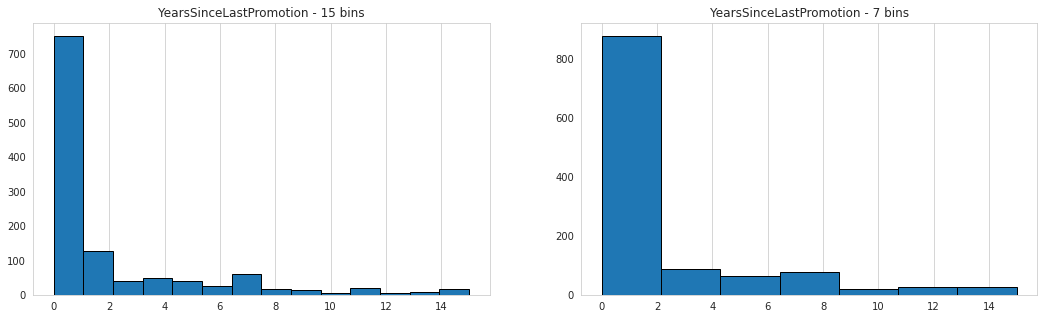

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))  
heights = df['YearsSinceLastPromotion']

axs[0].hist(heights, bins=14, ec="black") 
axs[0].title.set_text('YearsSinceLastPromotion - 15 bins')

axs[1].hist(heights, bins=7, ec="black")
axs[1].title.set_text('YearsSinceLastPromotion - 7 bins')

for ax in axs:
  ax.grid(axis="y")
  
plt.show()

33. YEARS WITH CURRENT MANAGER

In [ ]:
df.YearsWithCurrManager.describe()

count    1176.000000
mean        4.107993
std         3.601097
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

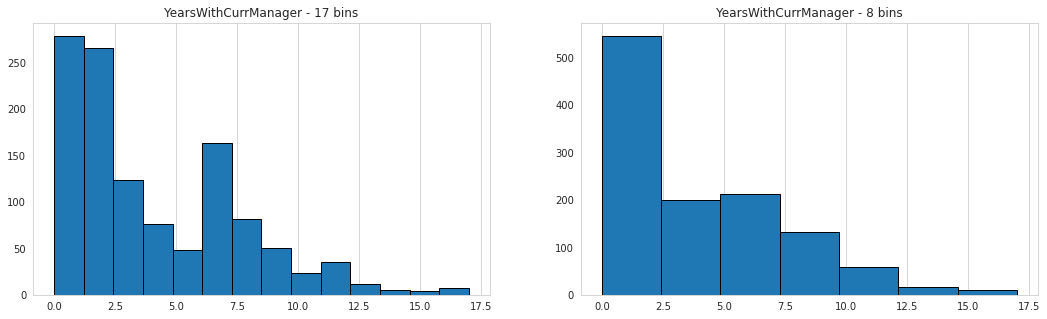

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))  
heights = df['YearsWithCurrManager']

axs[0].hist(heights, bins=14, ec="black") 
axs[0].title.set_text('YearsWithCurrManager - 17 bins')

axs[1].hist(heights, bins=7, ec="black")
axs[1].title.set_text('YearsWithCurrManager - 8 bins')

for ax in axs:
  ax.grid(axis="y")
  
plt.show()

# **3. - Assessing data quality : missing values and outliers**

---



INDIVIDUARE E TRATTARE I VALORI MANCANTI

In [ ]:
#df.isnull().any()

In [ ]:
#ANDRE: Evito di ristampare tutte gli attributi che non hanno missing values
ismissing = df.isnull().sum()
missingvalues = ismissing[ismissing!=0]
missingvalues

Age                      176
BusinessTravel           107
Gender                    59
MonthlyIncome            213
Over18                   372
PerformanceRating        138
StandardHours            570
TrainingTimesLastYear    233
YearsAtCompany            60
dtype: int64

1. TRATTAMENTO DEI VALORI NUMERICI CON KNN: AGE, BUSINESSTRAVEL, MONTHLYINCOME, PERFORMANCERATING, TRAININGTIMESLASTYEAR, YEARSATCOMPANY

Libreria per imputazione valori mancanti

In [ ]:
!pip install impyute

**Trasformiamo** Business Travel (ATTENZIONE: INPLACE SU DF ORIGINARIO)

> Blocco con rientro



In [ ]:
df['BusinessTravel'].replace(to_replace="Non-Travel", value=0, inplace=True)
df['BusinessTravel'].replace(to_replace="Travel_Rarely", value=1, inplace=True)
df['BusinessTravel'].replace(to_replace="Travel_Frequently", value=2, inplace=True)
df['BusinessTravel'].head()

0    1.0
1    1.0
2    2.0
3    1.0
4    1.0
Name: BusinessTravel, dtype: float64

Imputiamo i valori mancanti delle variabili numeriche (o categoriche rappresentate da numeri) in base ai valori di tutte le variabili numeriche (o categoriche rappresentate da numeri).

**Usiamo l'algoritmo KNN**:

In [ ]:
import sys
import impyute
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(df[["Age", "BusinessTravel", "DailyRate", "DistanceFromHome", "Education", "EnvironmentSatisfaction",  "HourlyRate", "JobInvolvement",  "JobLevel", "JobSatisfaction", 
                              "MonthlyIncome", "MonthlyRate",  "NumCompaniesWorked",  "PercentSalaryHike",  "PerformanceRating",  "RelationshipSatisfaction",  "StockOptionLevel", 
                              "TotalWorkingYears",  "TrainingTimesLastYear",  "WorkLifeBalance",  "YearsAtCompany", "YearsInCurrentRole",  "YearsSinceLastPromotion",
                              "YearsWithCurrManager", "MonthlyIncome"]].values, k=30)

imputed_training

array([[5.20000000e+01, 1.00000000e+00, 5.93000000e+02, ...,
        2.00000000e+00, 1.30000000e+01, 8.44600000e+03],
       [3.60000000e+01, 1.00000000e+00, 1.21800000e+03, ...,
        1.00000000e+00, 6.00000000e+00, 4.83400000e+03],
       [3.73002217e+01, 2.00000000e+00, 5.30000000e+02, ...,
        1.00000000e+00, 2.00000000e+00, 4.76800000e+03],
       ...,
       [3.30000000e+01, 1.10119293e+00, 5.83000000e+02, ...,
        0.00000000e+00, 3.00000000e+00, 2.50000000e+03],
       [4.50000000e+01, 0.00000000e+00, 1.17400000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 4.38500000e+03],
       [4.80000000e+01, 2.00000000e+00, 1.43100000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.71740000e+04]])

Stampiamo la matrice con tutte le variabili numeriche (o categoriche rappresentate da numeri) con i valori mancanti imputati

In [ ]:
"""for r in imputed_training:
    for c in r:
        print(c,end = "\t")
    print()"""

'for r in imputed_training:\n    for c in r:\n        print(c,end = "\t")\n    print()'

Creiamo una copia (df2) del nostro dataframe, inseriamo accanto alle colonne con i valori mancanti le nuove colonne con i valori imputati.

In [ ]:
df2 = df.copy()
#voglio aggiungere Age2OK, MonthlyIncome2, PerformanceRating2, TrainingTimesLastYear2, YearsAtCompany2
df2.insert(1, 'Age2', imputed_training[:, 0])
df2.insert(4, 'BusinessTravel2', imputed_training[:, 1])
df2.insert(19, 'MonthlyIncome2', imputed_training[:, 10])
df2.insert(26, 'PerformanceRating2', imputed_training[:, 14])
df2.insert(32, 'TrainingTimesLastYear2',  imputed_training[:, 18])
df2.insert(35, 'YearsAtCompany2',  imputed_training[:, 20])
df2.head()

Age       Age2  ... YearsSinceLastPromotion  YearsWithCurrManager
0  52.0  52.000000  ...                       2                    13
1  36.0  36.000000  ...                       1                     6
2   NaN  37.300222  ...                       1                     2
3  33.0  33.000000  ...                       0                     7
4   NaN  37.266262  ...                       2                     1

[5 rows x 39 columns]

Arrotondiamo i valori decimali che non possono esserlo (tutti) 

1.   Voce elenco
2.   Voce elenco



In [ ]:
df2[['Age2']] = df2[['Age2']].astype(int)
df2[['Age2']] = df2[['Age2']].astype(float)

df2[['BusinessTravel2']] = df2[['BusinessTravel2']].astype(int)
df2[['BusinessTravel2']] = df2[['BusinessTravel2']].astype(float)

df2[['MonthlyIncome2']] = df2[['MonthlyIncome2']].astype(int)
df2[['MonthlyIncome2']] = df2[['MonthlyIncome2']].astype(float)

df2[['PerformanceRating2']] = df2[['PerformanceRating2']].astype(int)
df2[['PerformanceRating2']] = df2[['PerformanceRating2']].astype(float)

df2[['TrainingTimesLastYear2']] = df2[['TrainingTimesLastYear2']].astype(int)
df2[['TrainingTimesLastYear2']] = df2[['TrainingTimesLastYear2']].astype(float)

df2[['YearsAtCompany2']] = df2[['YearsAtCompany2']].astype(int)
df2[['YearsAtCompany2']] = df2[['YearsAtCompany2']].astype(float)

df2.tail(3)

Age  Age2  ... YearsSinceLastPromotion  YearsWithCurrManager
1173  33.0  33.0  ...                       0                     3
1174  45.0  45.0  ...                       0                     1
1175  48.0  48.0  ...                       0                     0

[3 rows x 39 columns]

Salviamo il Dataset per possibili controlli manuali

In [ ]:
df2.to_csv('data.csv')
!cp data.csv "/content/drive/My Drive/DATA_MINING/"

Cancellare le vecchie colonne (che avevano i valori mancanti)
!!!!!! Per rifarlo PRIMA scommentare la riga di drop poi ricommentarla (PERICOLOSO)

In [ ]:
#Remove old columns
df2.drop(labels=["Age", "BusinessTravel", "MonthlyIncome", "PerformanceRating", "TrainingTimesLastYear", "YearsAtCompany"], axis=1, inplace=True)
#Change names
df2.rename(columns={"Age2": "Age", "BusinessTravel2" : "BusinessTravel", "MonthlyIncome2": "MonthlyIncome", "PerformanceRating2" : "PerformanceRating2", "TrainingTimesLastYear2" : "TrainingTimesLastYear", "YearsAtCompany2" : "YearsAtCompany"}, inplace=True)
df2.head()

Age Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0  52.0        No  ...                        2                    13
1  36.0        No  ...                        1                     6
2  37.0        No  ...                        1                     2
3  33.0        No  ...                        0                     7
4  37.0        No  ...                        2                     1

[5 rows x 33 columns]

TRATTAMENTO DEI VALORI MANCANTI NON NUMERICI O PARTICOLARI: GENDER, OVER18, STANDARDHOURS

3. GENDER

In [ ]:
df2['Gender'] = df2['Gender'].fillna(value='NoGender')
df2.head()

Age Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0  52.0        No  ...                        2                    13
1  36.0        No  ...                        1                     6
2  37.0        No  ...                        1                     2
3  33.0        No  ...                        0                     7
4  37.0        No  ...                        2                     1

[5 rows x 33 columns]

5. OVER18

In [ ]:
#trivial: tutti Yes ma comunque inutile, lo elimineremo fra poco
df2['Over18'] = df2['Over18'].fillna(value='Y')
df2.head()

Age Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0  52.0        No  ...                        2                    13
1  36.0        No  ...                        1                     6
2  37.0        No  ...                        1                     2
3  33.0        No  ...                        0                     7
4  37.0        No  ...                        2                     1

[5 rows x 33 columns]

7. STANDARD HOURS

In [ ]:
#trivial: tutti 80. ma comunque inutile, lo elimineremo fra poco
df2['StandardHours'] = df2['StandardHours'].fillna(value=80)
df2.head()

Age Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0  52.0        No  ...                        2                    13
1  36.0        No  ...                        1                     6
2  37.0        No  ...                        1                     2
3  33.0        No  ...                        0                     7
4  37.0        No  ...                        2                     1

[5 rows x 33 columns]

**OUTLIERS** **DETECTION** - FATTA SUL DATASET CON I VALORI MANCANTI RIEMPITI!

BOXPLOTS

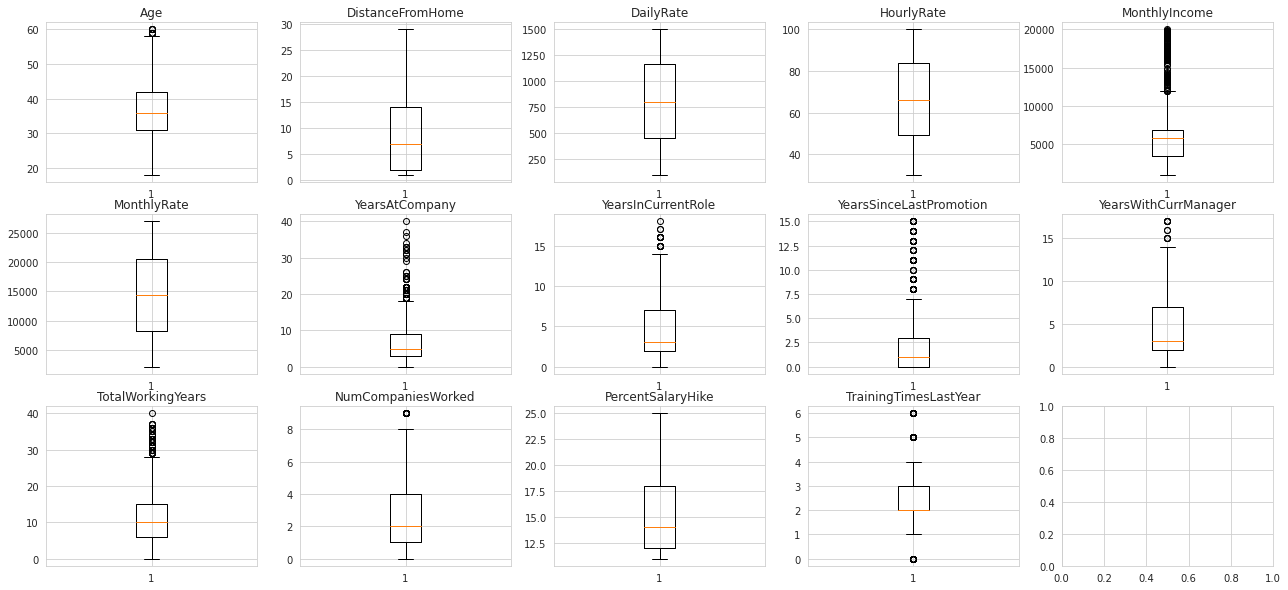

In [ ]:
fig, axs = plt.subplots(3, 5, figsize=(22, 10))

axs[0, 0].boxplot(df2["Age"]) #missvalue - TRATTATI
axs[0, 0].title.set_text('Age')
axs[0, 1].boxplot(df2["DistanceFromHome"])
axs[0, 1].title.set_text('DistanceFromHome')
axs[0, 2].boxplot(df2["DailyRate"])
axs[0, 2].title.set_text('DailyRate')
axs[0, 3].boxplot(df2["HourlyRate"])
axs[0, 3].title.set_text('HourlyRate')
axs[0, 4].boxplot(df2["MonthlyIncome"]) #MissValues - TRATTATI
axs[0, 4].title.set_text('MonthlyIncome')

axs[1, 0].boxplot(df2["MonthlyRate"])
axs[1, 0].title.set_text('MonthlyRate')
axs[1, 1].boxplot(df2["YearsAtCompany"]) #missvalue - TRATTATI
axs[1, 1].title.set_text('YearsAtCompany')
axs[1, 2].boxplot(df2["YearsInCurrentRole"])
axs[1, 2].title.set_text('YearsInCurrentRole')
axs[1, 3].boxplot(df2["YearsSinceLastPromotion"])
axs[1, 3].title.set_text('YearsSinceLastPromotion')
axs[1, 4].boxplot(df2["YearsWithCurrManager"])
axs[1, 4].title.set_text('YearsWithCurrManager')

#ANDRE: Queste sono numeriche e le avevamo saltate! Comunque anche in questi casi gli "outliers" sono normali secondo me!
axs[2, 0].boxplot(df2["TotalWorkingYears"])
axs[2, 0].title.set_text('TotalWorkingYears')
axs[2, 1].boxplot(df2["NumCompaniesWorked"])
axs[2, 1].title.set_text('NumCompaniesWorked')
axs[2, 2].boxplot(df2["PercentSalaryHike"])
axs[2, 2].title.set_text('PercentSalaryHike')
axs[2, 3].boxplot(df2["TrainingTimesLastYear"])
axs[2, 3].title.set_text('TrainingTimesLastYear')
plt.show()

I "baffi" rappresentano 1.5x lo scarto interquartile. Esempio, Age, scarto interquartile = (42-31)x1.5 = 16.5. 42+16.5 = 58.5

**AGE** - **OUTLIERS**

In [ ]:
df2.Age.describe()

count    1176.000000
mean       37.039116
std         8.412159
min        18.000000
25%        31.000000
50%        36.000000
75%        42.000000
max        60.000000
Name: Age, dtype: float64

In [ ]:
maxage = (42-31)*1.5+42
print(maxage)
print("Numero di Outliers in Age:", len(df2[df2['Age']>maxage]))

58.5
Numero di Outliers in Age: 10


**MonthlyIncome - OUTLIERS (con riprova grafica)**

In [ ]:
df2.MonthlyIncome.describe()

count     1176.000000
mean      6555.123299
std       4262.466316
min       1009.000000
25%       3450.750000
50%       5873.500000
75%       6836.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [ ]:
maxincome = (6836-3450.75)*1.5+6836
print(maxincome)
print("Numero di Outliers in MonthlyIncome:", len(df2[df2['MonthlyIncome']>maxincome]))

11913.875
Numero di Outliers in MonthlyIncome: 134


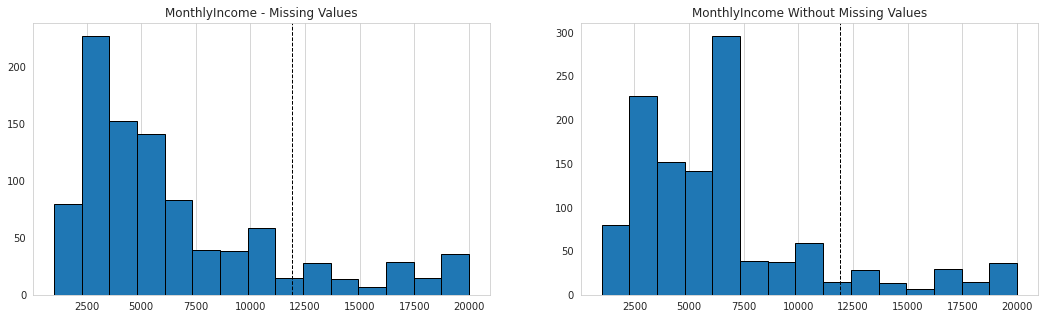

In [ ]:
#check
fig, axs = plt.subplots(1, 2, figsize=(18, 5))  
heights1 = df['MonthlyIncome']
heights2 = df2['MonthlyIncome']
axs[0].hist(heights1, bins=15, ec="black")
axs[0].title.set_text('MonthlyIncome - Missing Values')
axs[0].axvline(maxincome, color='k', linestyle='dashed', linewidth=1) 

axs[1].hist(heights2, bins=15, ec="black")
axs[1].title.set_text('MonthlyIncome Without Missing Values')
axs[1].axvline(maxincome, color='k', linestyle='dashed', linewidth=1) #ANDRE: PLOTTO LINEA IN CORRISPONDENZA DEL VALORE OLTRE IL QUALE SONO OUTLIERS
for ax in axs:
  ax.grid(axis="y")
plt.show()

**YearsAtCompany - OUTLIERS (con riprova grafica)**

In [ ]:
df2.YearsAtCompany.describe()

count    1176.000000
mean        6.920068
std         5.950754
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [ ]:
maxcompany = (9-3)*1.5+9
print(maxcompany)
print("Numero di Outliers in YearsAtCompany:", len(df2[df2['YearsAtCompany']>maxcompany]))

18.0
Numero di Outliers in YearsAtCompany: 75


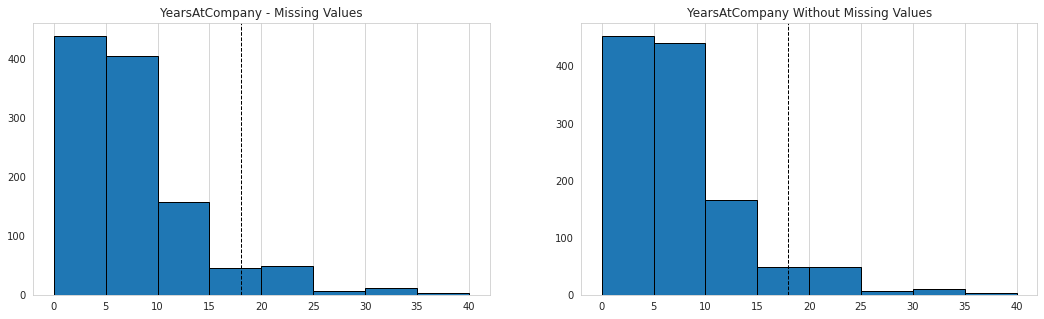

In [ ]:
#check
fig, axs = plt.subplots(1, 2, figsize=(18, 5))  
heights1 = df['YearsAtCompany']
heights2 = df2['YearsAtCompany']

axs[0].hist(heights1, bins=8, ec="black") 
axs[0].axvline(maxcompany, color='k', linestyle='dashed', linewidth=1) 
axs[0].title.set_text('YearsAtCompany - Missing Values')

axs[1].hist(heights2, bins=8, ec="black")
axs[1].axvline(maxcompany, color='k', linestyle='dashed', linewidth=1) 
axs[1].title.set_text('YearsAtCompany Without Missing Values')

for ax in axs:
  ax.grid(axis="y")
  
plt.show()

**YearsInCurrentRole - OUTLIERS**

In [ ]:
df2.YearsInCurrentRole.describe()

count    1176.000000
mean        4.188776
std         3.637405
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

In [ ]:
maxrole = (7-2)*1.5+7
print("Numero di Outliers in YearsInCurrentRole:", len(df2[df2['YearsInCurrentRole']>maxrole]))

Numero di Outliers in YearsInCurrentRole: 17


**YearsSinceLastPromotion - OUTLIERS**

In [ ]:
df2.YearsSinceLastPromotion.describe()

count    1176.000000
mean        2.171769
std         3.189785
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [ ]:
maxprom = (3-0)*1.5+3
print("Numero di Outliers in YearsSinceLastPromotion:", len(df2[df2['YearsSinceLastPromotion']>maxprom]))

Numero di Outliers in YearsSinceLastPromotion: 85


**YearsWithCurrManager - OUTLIERS**

In [ ]:
df2.YearsWithCurrManager.describe()

count    1176.000000
mean        4.107993
std         3.601097
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [ ]:
maxmanager = (7-2)*1.5+7
print("Numero di Outliers in YearsWithCurrentManager:", len(df2[df2['YearsWithCurrManager']>maxmanager]))

Numero di Outliers in YearsWithCurrentManager: 11


**TotalWorkingYears - OUTLIERS**

In [ ]:
df2.TotalWorkingYears.describe()

count    1176.000000
mean       11.019558
std         7.694848
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [ ]:
maxworking = (15-6)*1.5+15
print(maxworking)
print("Numero di Outliers in TotalWorkingYears:", len(df2[df2['TotalWorkingYears']>maxworking]))

28.5
Numero di Outliers in TotalWorkingYears: 49


**NumCompaniesWorked - OUTLIERS**

In [ ]:
df.NumCompaniesWorked.describe()

count    1176.000000
mean        2.663265
std         2.491287
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

In [ ]:
maxcompanies = (4-1)*1.5+4
print(maxcompanies)
print("Numero di Outliers in NumCompaniesWorked:", len(df2[df2['NumCompaniesWorked']>maxcompanies]))

8.5
Numero di Outliers in NumCompaniesWorked: 40


**TrainingTimesLastYear - OUTLIERS**

In [ ]:
df2.TrainingTimesLastYear.describe()

count    1176.000000
mean        2.706633
std         1.179898
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

In [ ]:
maxtraining = (3-2)*1.5+3
print(maxtraining)
print("Numero di Outliers in TrainingTimesLastYear (in eccesso):", len(df2[df2['TrainingTimesLastYear']>maxtraining]))
mintraining = 2-(3-2)*1.5
print(mintraining)
print("Numero di Outliers in TrainingTimesLastYear (in difetto):", len(df2[df2['TrainingTimesLastYear']<mintraining]))

4.5
Numero di Outliers in TrainingTimesLastYear (in eccesso): 120
0.5
Numero di Outliers in TrainingTimesLastYear (in difetto): 32


# **4 - Variables Transformation**

1. Fatto Sopra: BusinessTravel da categorica "a stringhe" a categorica "a numeri"

2. Fatto Sopra: Trasformare i Missing Values di Gender in NoGender #forse meglio inserirlo con missing values

3. Fatto Sopra: Trasformazione da float in int



```
# Questo è formattato come codice
```

4. Normalizzazione delle variabili numeriche



In [ ]:
df_normalizzato=df.copy()
listavarnum=['Age', "DailyRate", "DistanceFromHome","HourlyRate", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "YearsAtCompany",  "YearsInCurrentRole","YearsSinceLastPromotion", "YearsWithCurrManager", "TrainingTimesLastYear"]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
scaler.fit(df_normalizzato[listavarnum].values)

StandardScaler(copy=True, with_mean=True, with_std=True)

Utilizziamo tre metodi per la normalizzazione delle variabili numeriche: z-score, MinMax e RobustScaler

In [ ]:
#metodo z-score
pd.DataFrame(scaler.transform(df_normalizzato[listavarnum]), columns=df_normalizzato[listavarnum].columns)


Age  DailyRate  ...  YearsWithCurrManager  TrainingTimesLastYear
0     1.642495  -0.518193  ...              2.470300              -0.650046
1    -0.133055   1.019285  ...              0.525621               0.135843
2          NaN  -0.673170  ...             -0.585624               0.921732
3    -0.465971   0.367394  ...              0.803432              -1.435935
4          NaN   1.417799  ...             -0.863436                    NaN
...        ...        ...  ...                   ...                    ...
1171 -0.022083   0.785588  ...             -1.141247               0.135843
1172 -0.465971  -1.364420  ...              0.803432              -0.650046
1173 -0.465971  -0.542792  ...             -0.307813              -0.650046
1174  0.865692   0.911046  ...             -0.863436              -0.650046
1175  1.198607   1.543257  ...             -1.141247                    NaN

[1176 rows x 14 columns]

In [ ]:
#metodo MinMaxScaler
scaler1 = MinMaxScaler()

df_definitivo=pd.DataFrame(scaler1.fit_transform(df_normalizzato[listavarnum]), columns=df_normalizzato[listavarnum].columns)

df_definitivo

Age  DailyRate  ...  YearsWithCurrManager  TrainingTimesLastYear
0     0.809524   0.351467  ...              0.764706               0.333333
1     0.428571   0.798855  ...              0.352941               0.500000
2          NaN   0.306371  ...              0.117647               0.666667
3     0.357143   0.609162  ...              0.411765               0.166667
4          NaN   0.914817  ...              0.058824                    NaN
...        ...        ...  ...                   ...                    ...
1171  0.452381   0.730852  ...              0.000000               0.500000
1172  0.357143   0.105225  ...              0.411765               0.333333
1173  0.357143   0.344309  ...              0.176471               0.333333
1174  0.642857   0.767359  ...              0.058824               0.333333
1175  0.714286   0.951324  ...              0.000000                    NaN

[1176 rows x 14 columns]

In [ ]:
#comando per la visualizzazione dell'array
X = scaler1.fit_transform(df_normalizzato[listavarnum].values)
X[:5]

array([[0.80952381, 0.35146743, 0.28571429, 0.82857143, 0.39162717,
        0.46923942, 1.        , 0.42857143, 0.5       , 0.2       ,
        0.38888889, 0.13333333, 0.76470588, 0.33333333],
       [0.42857143, 0.79885469, 0.        , 0.31428571, 0.2014218 ,
        0.24560276, 0.11111111, 0.21428571, 0.525     , 0.025     ,
        0.44444444, 0.06666667, 0.35294118, 0.5       ],
       [       nan, 0.30637079, 0.53571429, 0.08571429, 0.19794629,
        0.56352903, 0.11111111, 1.        , 0.175     , 0.025     ,
        0.27777778, 0.06666667, 0.11764706, 0.66666667],
       [0.35714286, 0.60916249, 0.14285714, 0.5       , 0.09426014,
        0.62553209, 0.22222222, 0.21428571, 0.3       , 0.075     ,
        0.38888889, 0.        , 0.41176471, 0.16666667],
       [       nan, 0.91481747, 0.28571429, 0.64285714, 0.36698262,
        0.16954461, 0.11111111, 0.07142857, 0.05      , 0.25      ,
        0.11111111, 0.13333333, 0.05882353,        nan]])

In [ ]:
#metodo RobustScaler
transformer = RobustScaler().fit(df_normalizzato[listavarnum])
pd.DataFrame(transformer.transform(df_normalizzato[listavarnum]), columns=df_normalizzato[listavarnum].columns)

#transformer

Age  DailyRate  ...  YearsWithCurrManager  TrainingTimesLastYear
0     1.230769  -0.297812  ...                   2.0                   -1.0
1     0.000000   0.584333  ...                   0.6                    0.0
2          NaN  -0.386733  ...                  -0.2                    1.0
3    -0.230769   0.210303  ...                   0.8                   -2.0
4          NaN   0.812985  ...                  -0.4                    NaN
...        ...        ...  ...                   ...                    ...
1171  0.076923   0.450247  ...                  -0.6                    0.0
1172 -0.230769  -0.783345  ...                   0.8                   -1.0
1173 -0.230769  -0.311927  ...                   0.0                   -1.0
1174  0.692308   0.522230  ...                  -0.4                   -1.0
1175  0.923077   0.884968  ...                  -0.6                    NaN

[1176 rows x 14 columns]

In [ ]:
#metodo per la visualizzazione dell'array
transformer.transform(df_normalizzato[listavarnum])

array([[ 1.23076923, -0.29781228,  0.16666667, ...,  0.33333333,
         2.        , -1.        ],
       [ 0.        ,  0.5843331 , -0.5       , ...,  0.        ,
         0.6       ,  0.        ],
       [        nan, -0.38673253,  0.75      , ...,  0.        ,
        -0.2       ,  1.        ],
       ...,
       [-0.23076923, -0.31192661, -0.25      , ..., -0.33333333,
         0.        , -1.        ],
       [ 0.69230769,  0.52223006, -0.33333333, ..., -0.33333333,
        -0.4       , -1.        ],
       [ 0.92307692,  0.88496824,  0.58333333, ..., -0.33333333,
        -0.6       ,         nan]])

**Scegliamo il metodo MinMax** per la normalizzazione dei valori e **calcoliamo i dati mancanti su df_definitivo** (ovvero il dataset con i valori precedentemente normalizzati con il metodo MinMax)

In [ ]:
imputed_training2=fast_knn(df_definitivo[listavarnum].values, k=30)


In [ ]:
df_definitivo= pd.DataFrame(imputed_training2, columns=listavarnum)


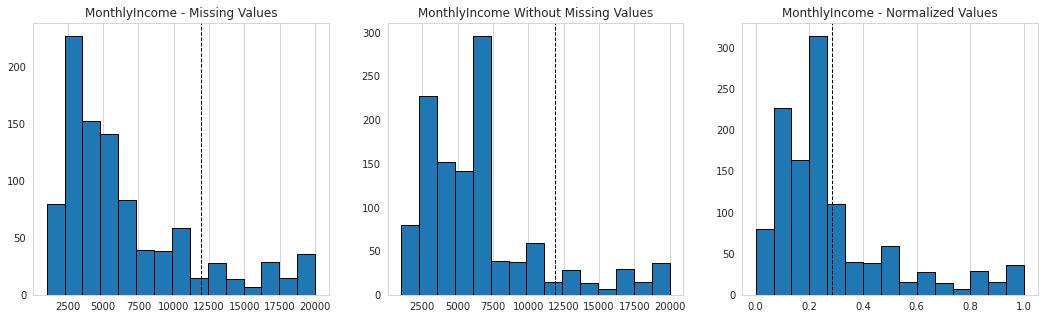

In [ ]:
#check
fig, axs = plt.subplots(1,3,figsize=(18, 5))  
heights1 = df['MonthlyIncome']
heights2 = df2['MonthlyIncome']
heights3 = df_definitivo['MonthlyIncome']

axs[0].hist(heights1, bins=15, ec="black")
axs[0].title.set_text('MonthlyIncome - Missing Values')
axs[0].axvline(maxincome, color='k', linestyle='dashed', linewidth=1) 

axs[1].hist(heights2, bins=15, ec="black")
axs[1].title.set_text('MonthlyIncome Without Missing Values')
axs[1].axvline(maxincome, color='k', linestyle='dashed', linewidth=1) #ANDRE: PLOTTO LINEA IN CORRISPONDENZA DEL VALORE OLTRE IL QUALE SONO OUTLIERS

axs[2].hist(heights3, bins=15, ec="black")
axs[2].title.set_text('MonthlyIncome - Normalized Values')
axs[2].axvline(df_definitivo['MonthlyIncome'].mean(), color='k', linestyle='dashed', linewidth=1) 
for ax in axs:
  ax.grid(axis="y")
plt.show()

Inseriamo le colonne normalizzate e senza valori mancanti nel database originale

In [ ]:
#df_completo è il dataframe contenente tutte le variabili senza valori mancanti e normalizzati per quelle numeriche
df_completo = df.copy()


df_completo.insert(1, "Age2", df_definitivo['Age'])
df_completo.insert(4, "DailyRate2", df_definitivo["DailyRate"])
df_completo.insert(7, "DistanceFromHome2", df_definitivo['DistanceFromHome'])
df_completo.insert(13, "HourlyRate2", df_definitivo["HourlyRate"])
df_completo.insert(20, "MonthlyIncome2", df_definitivo["MonthlyIncome"])
df_completo.insert(22, "MonthlyRate2", df_definitivo["MonthlyRate"])
df_completo.insert(24, "NumCompaniesWorked2", df_definitivo["NumCompaniesWorked"])
df_completo.insert(28, "PercentSalaryHike2", df_definitivo[ "PercentSalaryHike"])
df_completo.insert(34, "TotalWorkingYears2", df_definitivo[  "TotalWorkingYears"])
df_completo.insert(36, "TrainingTimesLastYear2", df_definitivo[ "TrainingTimesLastYear"])
df_completo.insert(39, "YearsAtCompany2", df_definitivo[ "YearsAtCompany"])
df_completo.insert(41, "YearsInCurrentRole2", df_definitivo[ "YearsInCurrentRole"])
df_completo.insert(43, "YearsSinceLastPromotion2", df_definitivo[ "YearsSinceLastPromotion"])
df_completo.insert(45, "YearsWithCurrManager2", df_definitivo[ "YearsWithCurrManager"])




df_completo.head()

Age      Age2  ... YearsWithCurrManager2  YearsWithCurrManager
0  52.0  0.809524  ...              0.764706                    13
1  36.0  0.428571  ...              0.352941                     6
2   NaN  0.432767  ...              0.117647                     2
3  33.0  0.357143  ...              0.411765                     7
4   NaN  0.431333  ...              0.058824                     1

[5 rows x 47 columns]

Elimino le colonne doppie e modifico i nomi, creando il nuovo dataframe chiamato df_completo2

In [ ]:
#Remove old columns
df_completo2= df_completo.drop(listavarnum, axis=1, inplace=False)


#Change names
df_completo2.rename(columns={"Age2": "Age", 'DailyRate2':'DailyRate',"DistanceFromHome2":'DistanceFromHome', 
                             "HourlyRate2":"HourlyRate","MonthlyIncome2":"MonthlyIncome","MonthlyRate2":"MonthlyRate",
                             "NumCompaniesWorked2":"NumCompaniesWorked", "PercentSalaryHike2":"PercentSalaryHike",
                             "TotalWorkingYears2":"TotalWorkingYears","YearsAtCompany2":"YearsAtCompany",
                             "YearsInCurrentRole2":"YearsInCurrentRole","YearsSinceLastPromotion2":"YearsSinceLastPromotion",
                             "YearsWithCurrManager2":"YearsWithCurrManager",
                             "TrainingTimesLastYear2":"TrainingTimesLastYear"}, inplace=True)
df_completo2.head()

Age Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0  0.809524        No  ...                 0.133333              0.764706
1  0.428571        No  ...                 0.066667              0.352941
2  0.432767        No  ...                 0.066667              0.117647
3  0.357143        No  ...                 0.000000              0.411765
4  0.431333        No  ...                 0.133333              0.058824

[5 rows x 33 columns]

Trattiamo i valori mancanti di StandardHours, Over18 e Gender (come già fatto prima) su df_completo2

In [ ]:
df_completo2['StandardHours'].fillna(80, inplace=True)
df_completo2['Over18'].fillna('Y', inplace=True)
df_completo2['Gender'] = df_completo2['Gender'].fillna(value='NoGender')

Eliminiamo le variabili non informative (StandardHours e Over18)

In [ ]:
df_completo2= df_completo2.drop(labels=['StandardHours','Over18'], axis=1, inplace=False)


**Trattiamo le variabili non numeriche** BusinessTravel e Performance Rating attraverso il metodo **MostFrequentValueMethod** (trovare un altro metodo o applicare anche KNN su variabili categoriche??)

In [ ]:
#Metodo MostFrequentValueMethod

#return the mode BusinessTravel
BusinessTravel_mode = df_completo2['BusinessTravel'].mode()
BusinessTravel_mode

0    1.0
dtype: float64

In [ ]:
#return the mode Performance Rating
PerformanceRating_mode= df_completo2['PerformanceRating'].mode()
PerformanceRating_mode

0    3.0
dtype: float64

In [ ]:
df_completo2['BusinessTravel'].fillna(1.0, inplace=True)
df_completo2['PerformanceRating'].fillna(3.0, inplace=True)


# **5 - Pairwise correlations and eventual elimination of redundant variables**

Visualizzazione attraverso scatterplot

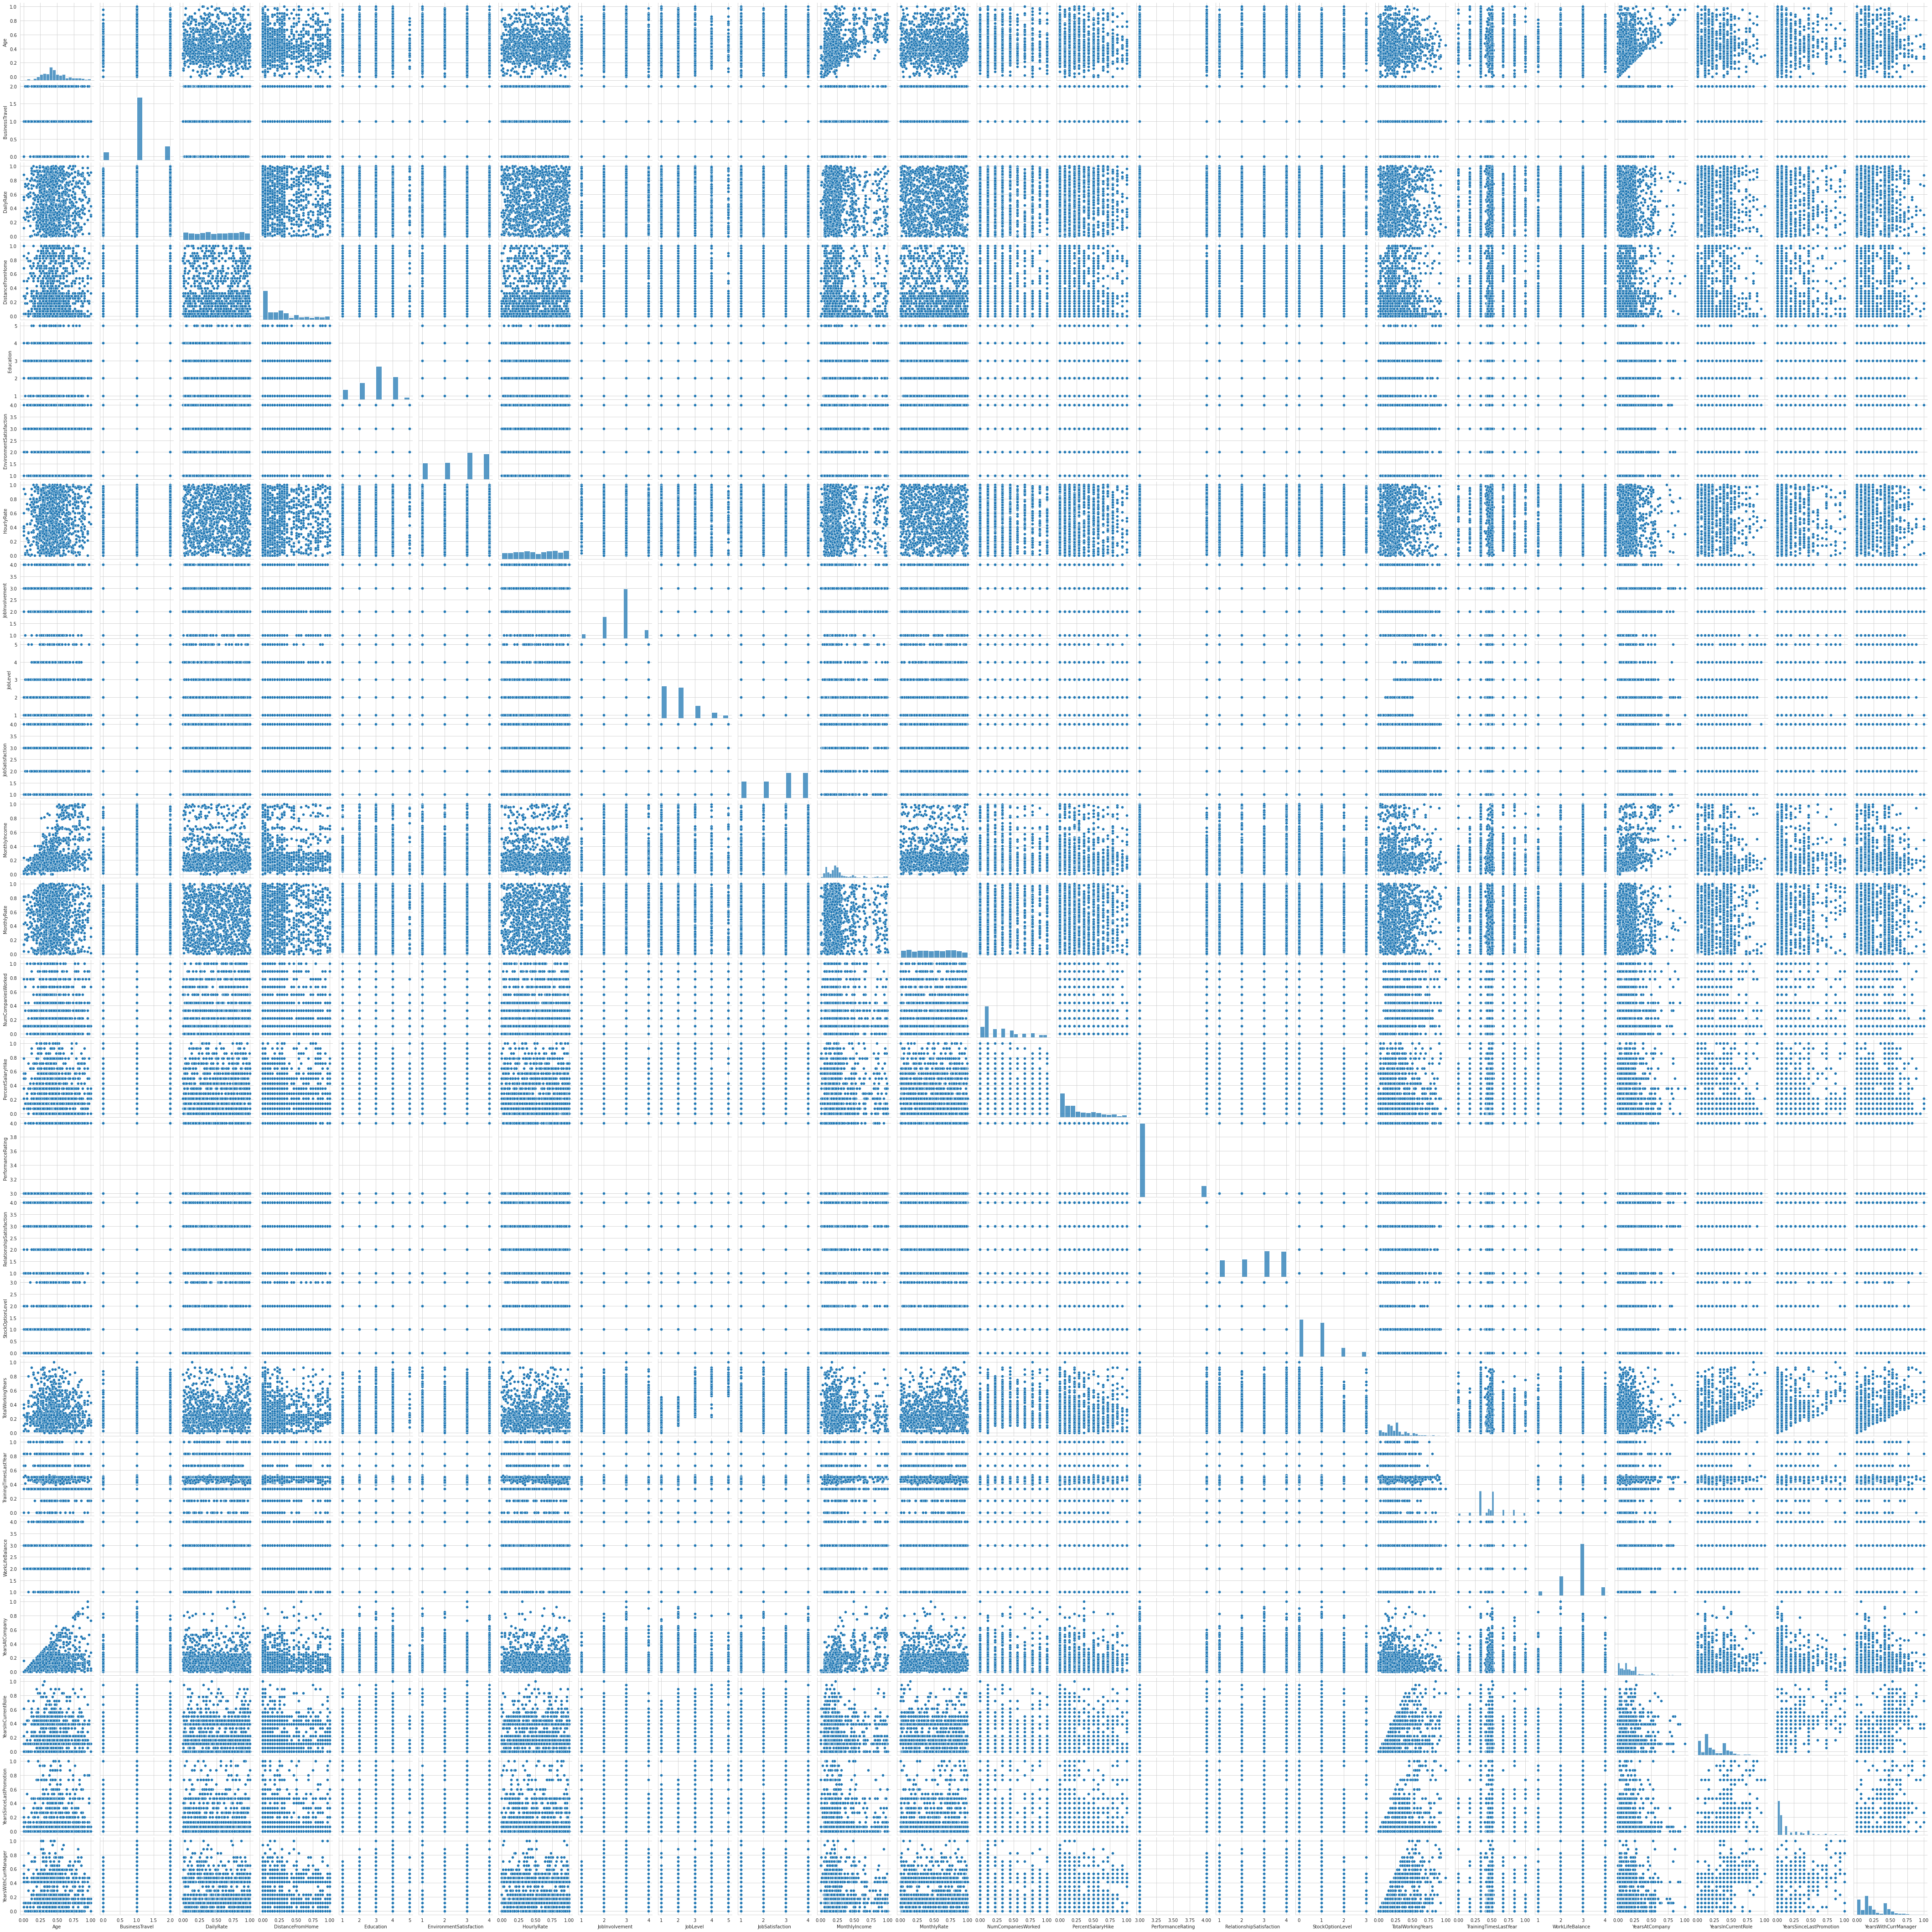

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df_completo2)

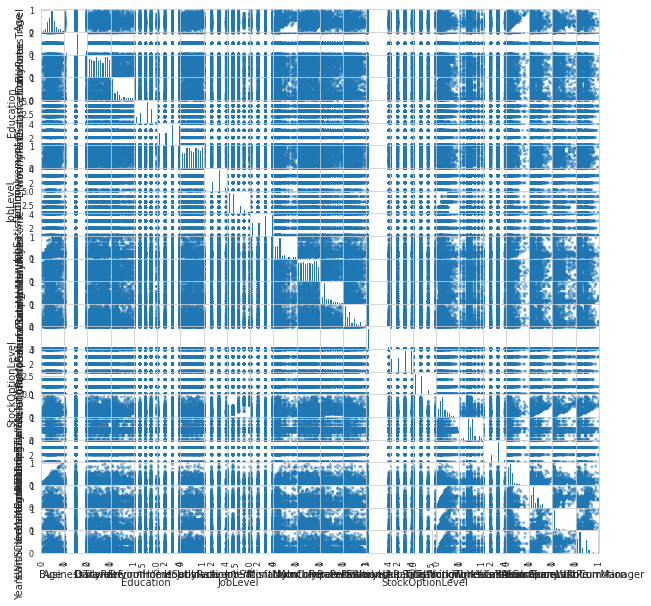

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_completo2, figsize=(10, 10))
plt.show()

**TotalWorkingYears vs JobLevel**

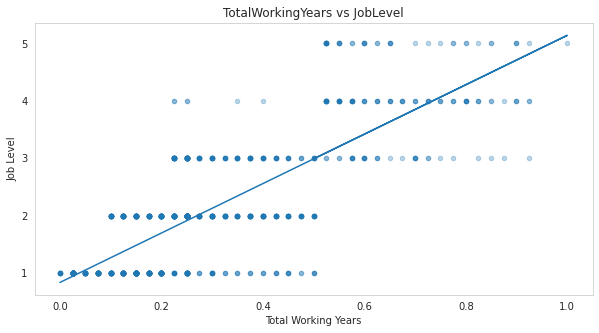

In [ ]:
rng = np.random.RandomState(0)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(df_completo2['TotalWorkingYears'],df_completo2['JobLevel'], s=20, alpha=0.3, cmap='viridis')
plt.tick_params(axis='both', which='major')
#plt.colorbar(); 
plt.title('TotalWorkingYears vs JobLevel')
plt.xlabel("Total Working Years")
plt.ylabel("Job Level")

plt.grid(axis="both")



m, b = np.polyfit(df_completo2['TotalWorkingYears'], df_completo2['JobLevel'], 1)
plt.plot(df_completo2['TotalWorkingYears'], m*df_completo2['TotalWorkingYears'] + b)

plt.show()

Si nota come al crescere del numero di anni totali di lavoro aumenti anche la posizione lavorativa. La loro correlazione è pari 0.77

**YearsWithCurrManager vs YearsInCurrentRole**

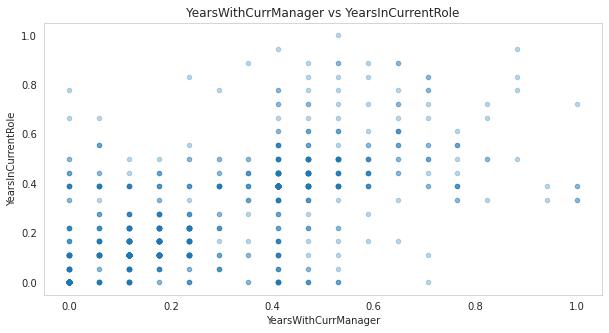

In [ ]:
rng = np.random.RandomState(0)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(df_completo2['YearsWithCurrManager'],df_completo2['YearsInCurrentRole'], s=20, alpha=0.3, cmap='viridis')
plt.tick_params(axis='both', which='major')
#plt.colorbar(); 
plt.title('YearsWithCurrManager vs YearsInCurrentRole')
plt.xlabel("YearsWithCurrManager")
plt.ylabel("YearsInCurrentRole")

plt.grid(axis="both")
plt.show()

Si nota la correlazione tra anni in cui l'impiegato ha lavorato con il manager corrente e quelli in cui ha lavorato nel ruolo corrente. La loro correlazione è di 0.71

**MonthlyIncome - YearsAtCompany** 

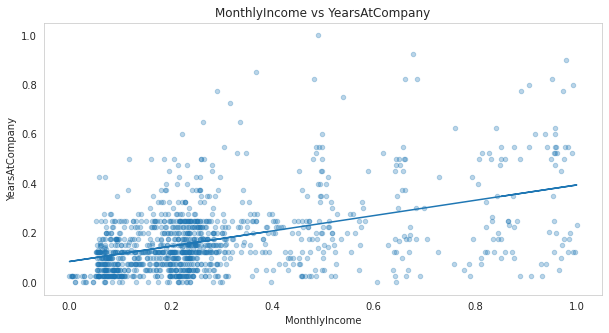

In [ ]:
rng = np.random.RandomState(0)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(df_completo2['MonthlyIncome'],df_completo2['YearsAtCompany'], s=20, alpha=0.3, cmap='viridis')
plt.tick_params(axis='both', which='major')
#plt.colorbar(); 
plt.title('MonthlyIncome vs YearsAtCompany')
plt.xlabel("MonthlyIncome")
plt.ylabel("YearsAtCompany")

plt.grid(axis="both")


m, b = np.polyfit(df_completo2['MonthlyIncome'], df_completo2['YearsAtCompany'], 1)
plt.plot(df_completo2['MonthlyIncome'], m*df_completo2['MonthlyIncome'] + b)

plt.show()

Si nota la correalzione tra il guadagno mensile rispetto a quanti anni ha lavorato l'impiegato nell'azienda (0.51)

**YearsSinceLastPromotion - YearsInCurrentRole**

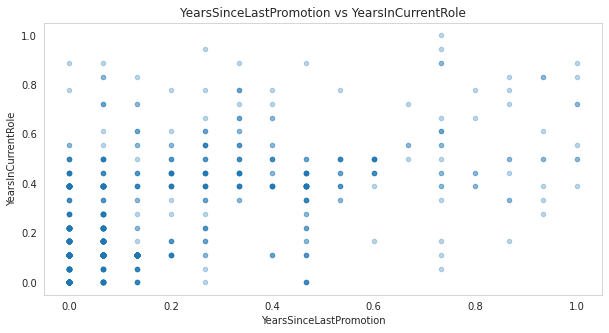

In [ ]:
rng = np.random.RandomState(0)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(df_completo2['YearsSinceLastPromotion'],df_completo2['YearsInCurrentRole'], s=20, alpha=0.3, cmap='viridis')
plt.tick_params(axis='both', which='major')
#plt.colorbar(); 
plt.title('YearsSinceLastPromotion vs YearsInCurrentRole')
plt.xlabel("YearsSinceLastPromotion")
plt.ylabel("YearsInCurrentRole")

plt.grid(axis="both")
plt.show()

Si nota la correlazione tra gli anni passati dall'ultima promozione rispetto agli anni nel ruolo corrente (0.57)

**YearsSinceLastPromotion - YearsWithCurrManager**

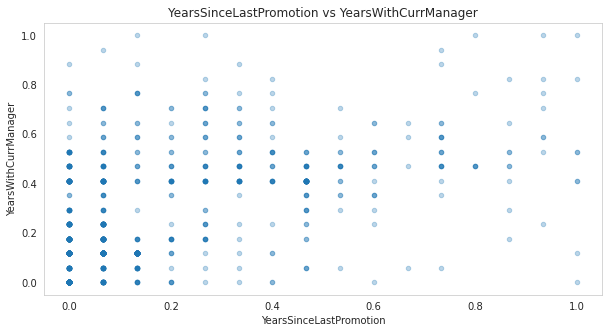

In [ ]:
rng = np.random.RandomState(0)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(df_completo2['YearsSinceLastPromotion'],df_completo2['YearsWithCurrManager'], s=20, alpha=0.3, cmap='viridis')
plt.tick_params(axis='both', which='major')
#plt.colorbar(); 
plt.title('YearsSinceLastPromotion vs YearsWithCurrManager')
plt.xlabel("YearsSinceLastPromotion")
plt.ylabel("YearsWithCurrManager")

plt.grid(axis="both")
plt.show()

La relazione tra gli anni passati dall'ultima promozione e quelli pssati con il corrente manager (0.52)

**Age - MonthlyIncome**

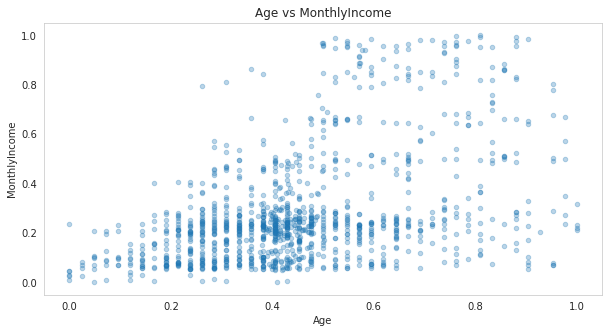

In [ ]:
rng = np.random.RandomState(0)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(df_completo2['Age'],df_completo2['MonthlyIncome'], s=20, alpha=0.3, cmap='viridis')
plt.tick_params(axis='both', which='major')
#plt.colorbar(); 
plt.title('Age vs MonthlyIncome')
plt.xlabel("Age")
plt.ylabel("MonthlyIncome")

plt.grid(axis="both")
plt.show()

La correlazione tra l'età dell'impiegato e il guadagno mensile è molto bassa (0.50)

**Age vs. Gender**

ci sono più uomini e le donne superano gli uomini per età solo in alcune più avanzate d'età, pochissime assunte donne tra 30-40.
[#ANDRE: Nella fascia 22-26 (2^ e 3^ colonna) ce ne sono ancora meno, anche in proporzione: meno della metà degli uomini.]

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


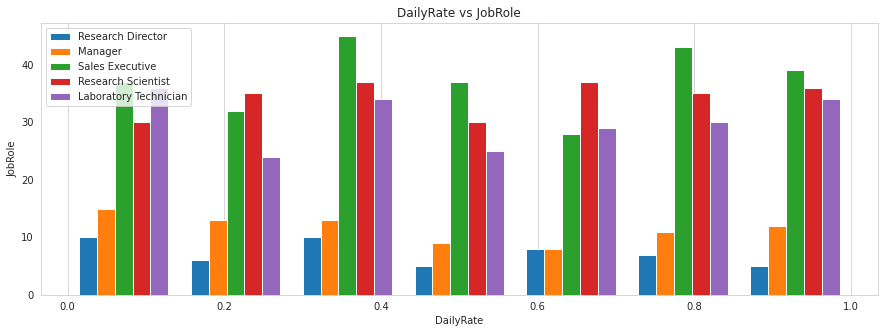

In [ ]:
#DailyRate vs JobRole

plt.figure(figsize=(15, 5))

df1 = df_completo2[df_completo2['JobRole']=='Research Director']['DailyRate']
df2 = df_completo2[df_completo2['JobRole']=='Manager']['DailyRate']
df3 = df_completo2[df_completo2['JobRole']=='Sales Executive']['DailyRate']
df4 = df_completo2[df_completo2['JobRole']=='Research Scientist']['DailyRate']
df5 = df_completo2[df_completo2['JobRole']=='Laboratory Technician']['DailyRate']

plt.hist([df1,df2,df3,df4,df5], 
         bins=7,                  #ANDRE: Ho provato a diminuire i bins, con 15 mi sembrava troppo poco leggibile, ditemi voi! 
         stacked=False)

plt.legend(('Research Director', 'Manager', 'Sales Executive', 'Research Scientist', 'Laboratory Technician'), loc='best')
plt.title('DailyRate vs JobRole')
plt.xlabel('DailyRate')
plt.ylabel('JobRole')
plt.grid(axis="y") 

plt.show()

MATRICI DI CORRELAZIONE

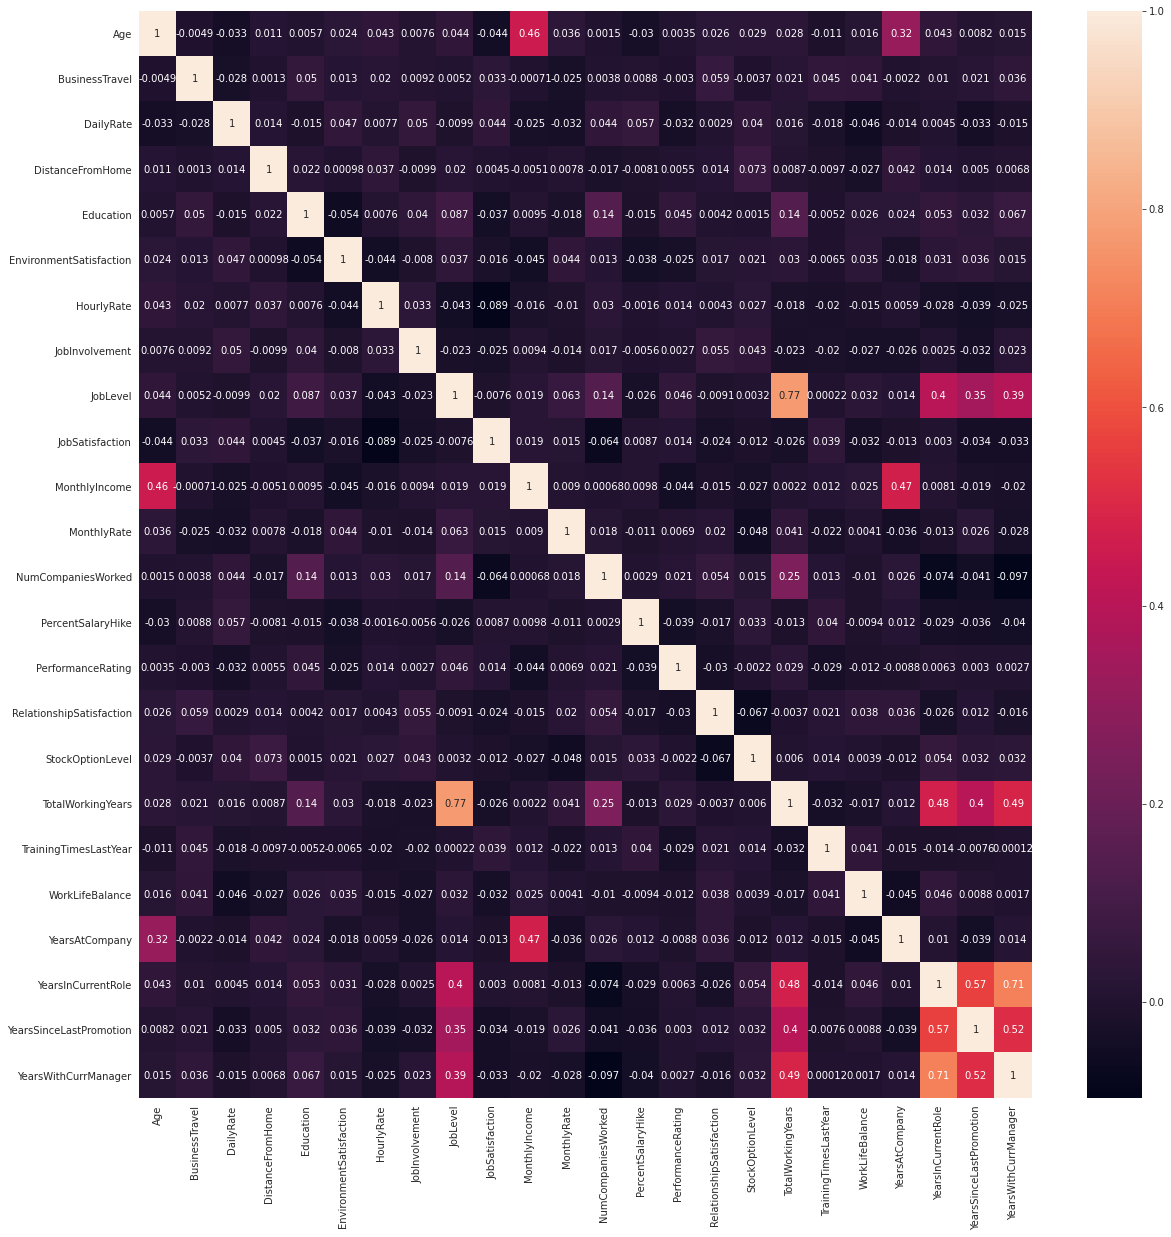

In [ ]:
df_correlation=df_completo2.copy()

#standardhours ha molti valori mancanti, la correlazione assume un valore NaN, quindi lo eliminiamo dal db
#del df_correlation['StandardHours']

plt.figure(figsize=(20, 20))

sns.heatmap(df_correlation.corr(), annot=True)
plt.show()



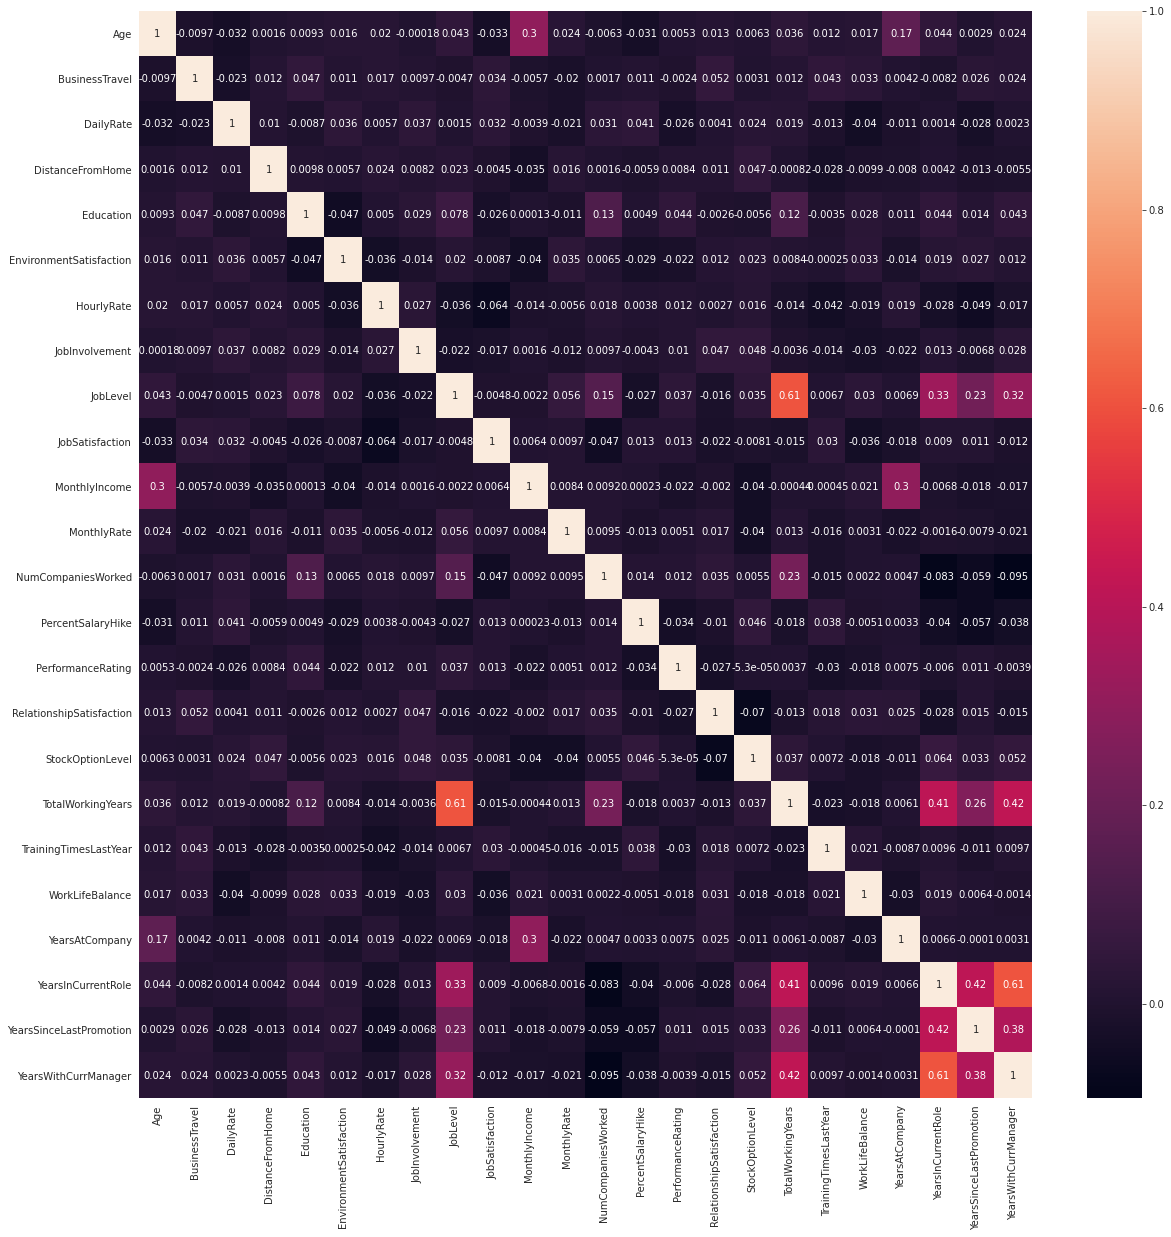

In [ ]:
#correlazione kendall
plt.figure(figsize=(20, 20))

sns.heatmap(df_correlation.corr(method="kendall"), annot=True)
plt.show()

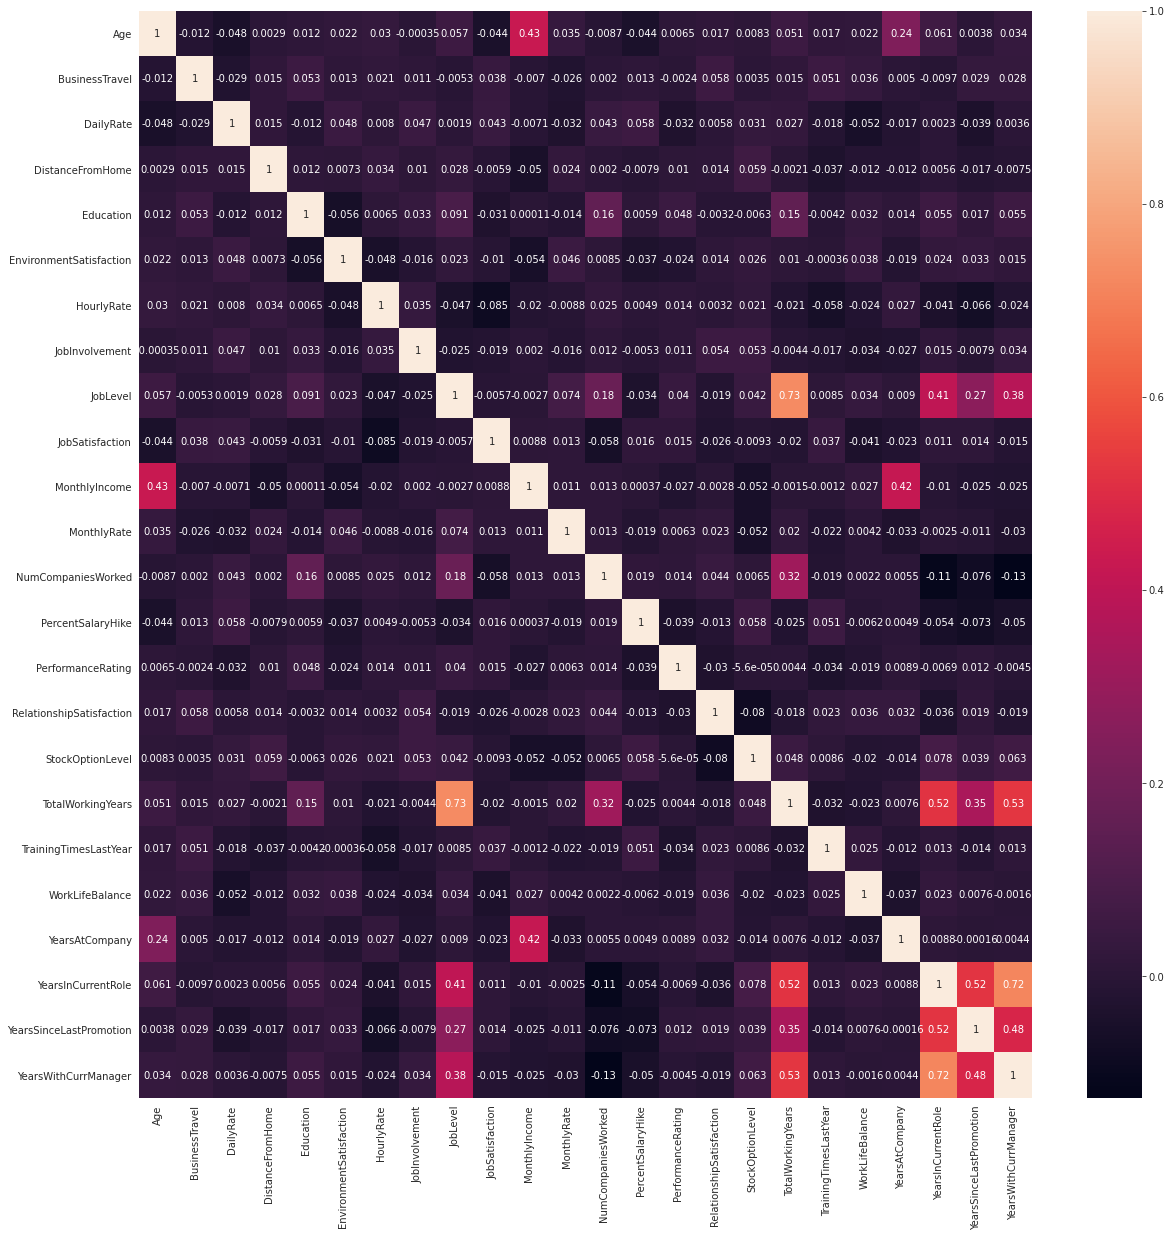

In [ ]:
#correlazione spearman
plt.figure(figsize=(20, 20))

sns.heatmap(df_correlation.corr(method="spearman"), annot=True)
plt.show()

In [ ]:
df_correlation.head()

Age Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0  0.809524        No  ...                 0.133333              0.764706
1  0.428571        No  ...                 0.066667              0.352941
2  0.432767        No  ...                 0.066667              0.117647
3  0.357143        No  ...                 0.000000              0.411765
4  0.431333        No  ...                 0.133333              0.058824

[5 rows x 31 columns]

In [ ]:
df_correlation.corr() #method : {‘pearson’, ‘kendall’, ‘spearman’}

Age  ...  YearsWithCurrManager
Age                       1.000000  ...              0.014939
BusinessTravel           -0.004874  ...              0.036252
DailyRate                -0.032679  ...             -0.015054
DistanceFromHome          0.011194  ...              0.006839
Education                 0.005749  ...              0.066882
EnvironmentSatisfaction   0.023589  ...              0.014774
HourlyRate                0.043477  ...             -0.025352
JobInvolvement            0.007637  ...              0.022631
JobLevel                  0.043500  ...              0.391790
JobSatisfaction          -0.044095  ...             -0.032654
MonthlyIncome             0.455391  ...             -0.019936
MonthlyRate               0.035542  ...             -0.027774
NumCompaniesWorked        0.001491  ...             -0.096784
PercentSalaryHike        -0.030360  ...             -0.039616
PerformanceRating         0.003531  ...              0.002727
RelationshipSatisfaction  0.025762  ...             -0.016488
StockOptionLevel          0.028536  ...              0.032072
TotalWorkingYears         0.028496  ...              0.486055
TrainingTimesLastYear    -0.011395  ...              0.000122
WorkLifeBalance           0.015866  ...              0.001667
YearsAtCompany            0.315053  ...              0.014056
YearsInCurrentRole        0.043291  ...              0.710746
YearsSinceLastPromotion   0.008197  ...              0.515614
YearsWithCurrManager      0.014939  ...              1.000000

[24 rows x 24 columns]